In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
from sklearn  import preprocessing, decomposition, base
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, SGDClassifier, SGDRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, KFold, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, make_scorer, roc_curve, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import statsmodels.formula.api as sm
from sklearn.svm import SVC, SVR

import xgboost as xgb
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_importance

import xgboost as xgb
from xgboost import XGBRFRegressor, XGBRegressor
from xgboost import plot_importance
import time

import pickle
from IPython.display import display
from matplotlib import interactive 
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
pd.options.display.max_columns = 40

from datetime import*
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import fbeta_score, make_scorer


#from utils import *

os.getcwd()

'C:\\Users\\feder\\Desktop\\Enel\\Models&Datasets_final\\Parametric_10sn'

In [3]:
def cont_modello(task):
    """Return un diz con chiavi X_train, X_test, y_train, y_test, best_estimator
    caso: 'classo', 'rollingreg', 'rollingreg' """
    
    if task== 'class':
        X_train= cont_class['X_train']
        X_test= cont_class['X_test']
        y_train= cont_class['ytrain']
        y_test= cont_class['ytest']
        #best_est= best_class_rf
        #feat_imp= feats_imp_class
        
    elif task== 'reg':
        X_train= cont_reg['X_train']
        X_test= cont_reg['X_test']
        y_train= cont_reg['ytrain']
        y_test= cont_reg['ytest']
        #best_est= best_reg_rf
        #feat_imp= feats_imp_rfreg
        
    return {'X_train': X_train, 'X_test': X_test, 'ytrain': y_train, 'ytest': y_test} #, 'best_estimator': best_est,
           #'feat_imp': feats_imp_rfreg}

In [4]:
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']


def title_ticks_ecc(title, xlabel, ylabel, new_fig= True , figsize= (10,6)):
    if new_fig== True:
        plt.figure(figsize=figsize)
        
    plt.title(title, color='red', fontsize= 18, pad= 13)
    plt.xlabel(xlabel, color='red', fontsize= 14)
    plt.ylabel(ylabel, color='red', fontsize= 14)
    plt.xticks(fontsize=12, color='blue')
    plt.yticks(fontsize=12, color='blue')
    
def MAPE(y_true, y_pred):   #
    """mean_absolute_percentage_error. Nel mio caso non ha senso, sono gia tutte percentuali. Se divido per y_true, 
    #ho quasi divisione per 0 a volte...perciò meglio MAE, che essendo su valori % funge praticamente da MAPE"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [5]:
def plot_boundary_2dim_reg(best_estimator, colors= ('c', 'orange'), model_name= 'RF'):
    copy_best_est= copy.deepcopy(best_estimator)
    best_estimator_bound= copy_best_est.fit(Xtrain_pca[:, :2], cont_class['ytrain'])
    
    title_ticks_ecc('{} Boundary(Training set)'.format(model_name), '', '')

    X_set, y_set = Xtrain_pca[:, :2], ytrain_class
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, best_estimator_bound.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(colors))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(colors)(i), label = j)

<b> <center> <a id='models'>  <h1> Models </h1>  </center> <br>
1. <a href='#dim_red'> <h3> Dimensionality Reduction </h3>
    * <a href='#pca'> PCA
        * <a href='#pca2dim'>  Plot 2 dimensions
        * <a href='#pca3dim'>  Plot 3 dimensions
    * <a href='#tsne'>  T-Sne
        * <a href='#tsne2dim'>  Plot 2 dimensions
        * <a href='#tsne3dim'>  Plot 3 dimensions 
    
2. <a href='#rf_rol'> <h3> Random Forest </h3>
    * <a href='#bound_rf'>  Boundary RF 2-dimensions
    * <a href='#rf_stat'>  RF Statico
    * <a href='#pca_rf'>  PCA + RF 
    * <a href='#rf_feats_imp'>  Feature Importances
    * <a href='#lasso_rf'> Lasso + RF
        * <a href='#plot_lasso_rf'> Plot Lasso + RF
        * <a href='#imp_lasso_rf'> Feat Importance 'Recursive Lasso' & RF

2. <a href='#lr'> <h3> Logistic Regression  </h3>
    * <a href='#bound_lr'>  Boundary Logistic
    * <a href='#plot_lr_C'>   Plot F1 with different penalties
    * <a href='#lr_stat'>  Statico
    * <a href='#opt_thresh_lr'>  Optimal Threshold ( t.c. max TPR - FPR )
    * <a href='#pca_lr'>  PCA + Logistic 
    * <a href='#sgd_lr'>  Logistic with SGDClassifier
    
3. <a href='#knn'> <h3> K-Nearest Neighbors  </h3>
    * <a href='#knn_plot'>  Performance al variare di n° neighbors
    * <a href='#bound_knn'>  Boundary Knn
    * <a href='#knn_stat'>  Statico

4. <a href='#svm'> <h3> Support Vector Machines </h3>
    * <a href='#svm_linear'>  Linear Kernel
        * <a href='#pca_svm_linear'>  PCA + Linear Kernel
    * <a href='#svm_rbf'>  Gaussian Kernel
        * <a href='#bound_svm'>  Boundary Svm
        * <a href='#pca_svm_rbf'>  PCA + Gaussian Kernel
        * <a href='#bagging_svm'>  Bagging + SVM
    * <a href='#svm_stat'>  Svm Statico
    * <a href='#sgd_svm'>  Svm with SGDClassifier

5. <a href='#gb'> <h3> Gradient Boosting  </h3>
    * <a href='#gb'>  GradientBoostingClassifier
        * <a href='#bound_old_gb'>  Boundary 
        * <a href='#pca_old_gb'>  PCA + Gradient Boosting
    * <a href='#xgbrf'>  XGBRFClassifier
    * <a href='#xgboost'>  XGBoost
        * <a href='#bound_xgb'>  Boundary 
        * <a href='#reduced_xgb'> Lasso/PCA + XGBoost (Best Boosting)
    * <a href='#xgb_stat'>  Statico

6. <a href='#ens'> <h3> Ensemble - Voting Classifier  </h3>
    * <a href='#ens'>  Hard (simple majority vote)
    * <a href='#soft'> Soft (averaging probabilities)
    * <a href='#voting_stat'>  Statico     <b>
    
7. <a href='#roc_curves'> <h3> Final Results  </h3>
    * <a href='#roc_curves'>  ROC Curves
    * <a href='#all_results'>  All Models Performances

In [6]:
######################## IMPORTO LISTE IN PICKLE #########################
DUMMIES= False
REMOVE_N_ORDERS= False
REMOVE_SEASONALITIES= True

TRANSFORM_TARGET= False
with open('../datasets/final_class_10sn.pickle', 'rb') as cont_class:
    cont_class= pickle.load(cont_class)
    
with open('../datasets/final_reg_10sn.pickle', 'rb') as cont_reg:
    container_reg= cont_reg= pickle.load(cont_reg)
    
containers= [cont_class, cont_reg]
       
    
trimesters_cols= [col for col in cont_class['X_train'].columns if col.startswith('orders_trim')]+ ['initial_trimester']
if REMOVE_SEASONALITIES:
    for cont in containers:
        for X in ['X_train', 'X_test']:
            cont[X].drop(trimesters_cols, axis=1, inplace=True)
#X_train_class= cont_class['X_train']
#X_test_class= cont_class['X_test']    
        
X_train_reg= cont_reg['X_train']
X_test_reg= cont_reg['X_test']

#(34379, 13) (6068, 13) (28732, 17) (5032, 17)
print('Shapes X Train and Test', X_train_reg.shape, X_test_reg.shape)  #(37907, 25) (6706, 25)

Shapes X Train and Test (76326, 27) (13270, 27)


In [7]:
def plot_preds_true(ytrue, ypred, single_model= True, plot_only_reg= True, n_to_show= 1000, diz_models= None, n_cols= 2):
  """diz_models deve essere dizionario con modello: nome_modello"""
  index= np.arange(len(container_reg['ytest']))
  ypred= pd.DataFrame(ypred,  index= index ).squeeze()
  ytrue= pd.DataFrame(ytrue, index= index).squeeze()

  if single_model is True:
    if plot_only_reg is True:
      title_ticks_ecc('Preds VS True', 'True', 'Pred')
      plt.scatter(ytrue, ypred, label= 'True', c= np.random.choice(colors))

    else:
      plt.figure(figsize= (15, 5), )
      plt.subplot(1, 2, 1 )
      plt.title('Preds VS True', fontsize= 12, color= 'red')
      plt.plot(ytrue[:n_to_show], color='c', label= 'True')
      plt.plot(ypred[:n_to_show], color='orange', label= 'Pred')
      plt.legend(fontsize= 15)

      plt.subplot(1, 2, 2 )
      plt.title('Preds VS True\n(Ideale è Bisettrice)', fontsize= 12, color= 'red')
      plt.scatter(ytrue, ypred, label= 'True', c= np.random.choice(colors))
      plt.ylabel('Pred', fontsize= 12, color= 'red')
      plt.xlabel('True', fontsize= 12, color= 'red')
      plt.legend()
      plt.tight_layout()

  elif single_model is False:
    rows_for_n_cols= np.ceil(len(diz_models)/n_cols)
    plt.figure(figsize= (15, 10))
    for i, est in enumerate(diz_models):
      ypred= pd.Series(est.predict(container_reg['X_test']), index= np.arange(len(container_reg['ytest'])))
      plt.subplot(rows_for_n_cols, n_cols, i+1)
      plt.title('Preds VS True {}'.format(diz_models[est]), fontsize= 12, color= 'red')
      plt.scatter(ytrue, ypred, label= 'True', c= np.random.choice(colors))
      plt.ylabel('Pred', fontsize= 12, color= 'red')
      plt.legend()
      plt.tight_layout()

In [8]:
X_train_reg.head()

,Variant code,Contract Type,Header amount,Main material group qualification flag,Professional services flag,num_orders,%avg_importo,%std_importo,%avg_intervals,%std_intervals,life%,%days_til_first_order,durata_nominale_gg,percentage_used,ordini/mese,True/Ideal Slope,Accel_orders,Accel_%used,%days_from_last_order,VMD Code_FINAL_ENC,QMG Code_FINAL_ENC,Purchase Unit Code_FINAL_ENC,Global Business line_FINAL_ENC,Geographical Area_FINAL_ENC,Supplier Type Code_FINAL_ENC,Purchase document type_FINAL_ENC,Job type_FINAL_ENC
Purchase document,,,,,,,,,,,,,,,,,,,,,,,,,,,
DI\8400060305,0.0,0.0,28.82395,-1.0,0.0,-0.2,-0.057640,0.000000,-0.389683,0.000000,-0.75,-0.517864,1.851324,-0.155730,-0.121951,-0.355348,0.000,0.000000,-0.065705,0.379424,-0.088194,-0.224535,-1.174987,-1.207811,0.206781,0.574127,-0.865944
DI\8400060305,0.0,0.0,28.82395,-1.0,0.0,308.4,-0.057091,0.005461,-0.393375,0.031061,-0.50,-0.363977,1.851324,-0.012152,434.121951,0.366317,1.000,1.018330,0.000000,-0.301717,-0.202577,0.099109,-0.709181,-1.289694,-0.116032,0.626941,-1.016228
DI\8400060305,0.0,0.0,28.82395,-1.0,0.0,653.0,-0.057091,0.004854,-0.393375,0.021783,-0.25,-0.363977,1.851324,0.120957,459.451220,0.339974,1.117,0.943992,0.000000,-0.019380,-0.322352,-0.028090,-1.114178,-1.099931,0.233905,0.723480,-0.656587
DI\8400060305,0.0,0.0,28.82395,-1.0,0.0,1019.0,-0.057201,0.004248,-0.393375,0.018556,0.00,-0.363977,1.851324,0.259862,477.926829,0.340911,1.062,1.063136,0.000000,-0.039827,0.013032,-0.179969,-0.667173,-1.793895,-0.798261,0.508630,-0.873995
DI\8400060305,0.0,0.0,28.82395,-1.0,0.0,1347.0,-0.057091,0.004248,-0.393375,0.018556,0.25,-0.363977,1.851324,0.412600,472.890244,0.357411,0.896,1.120163,0.000000,-0.180619,-0.217786,-0.029641,-1.001306,-1.384537,0.372296,0.932903,-0.829206


In [9]:
scaled_train= scaled_train_reg= cont_reg['X_train']
scaled_test= scaled_test_reg= cont_reg['X_test']    
        
scaled_train_reg= cont_reg['X_train']
scaled_test_reg= cont_reg['X_test']

In [10]:
scaled_train is scaled_train_reg is cont_reg['X_train']

True

In [11]:
prova= cont_reg['ytrain']
if TRANSFORM_TARGET:
    cont_reg['ytrain']= np.log1p(cont_reg['ytrain'])
    cont_reg['ytest']= np.log1p(cont_reg['ytest'])

ytrain_reg= cont_reg['ytrain']
ytest_reg= cont_reg['ytest']
ytrain_reg= cont_reg['ytrain']
ytest_reg= cont_reg['ytest']


print('Shapes Target Static and Rolling25', ytrain_reg.shape, ytest_reg.shape, ytrain_reg.shape, ytest_reg.shape)

Shapes Target Static and Rolling25 (76326,) (13270,) (76326,) (13270,)


Text(0.5, 1.0, 'Transformed target distribution')

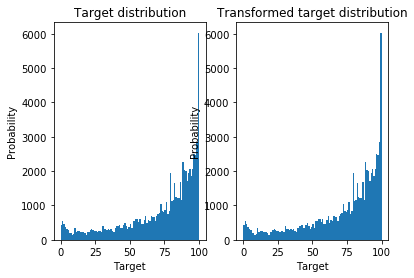

In [12]:
f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(prova, bins=100)
ax0.set_ylabel('Probability')
ax0.set_xlabel('Target')
ax0.set_title('Target distribution')

ax1.hist(ytrain_reg, bins=100, )
ax1.set_ylabel('Probability')
ax1.set_xlabel('Target')
ax1.set_title('Transformed target distribution')

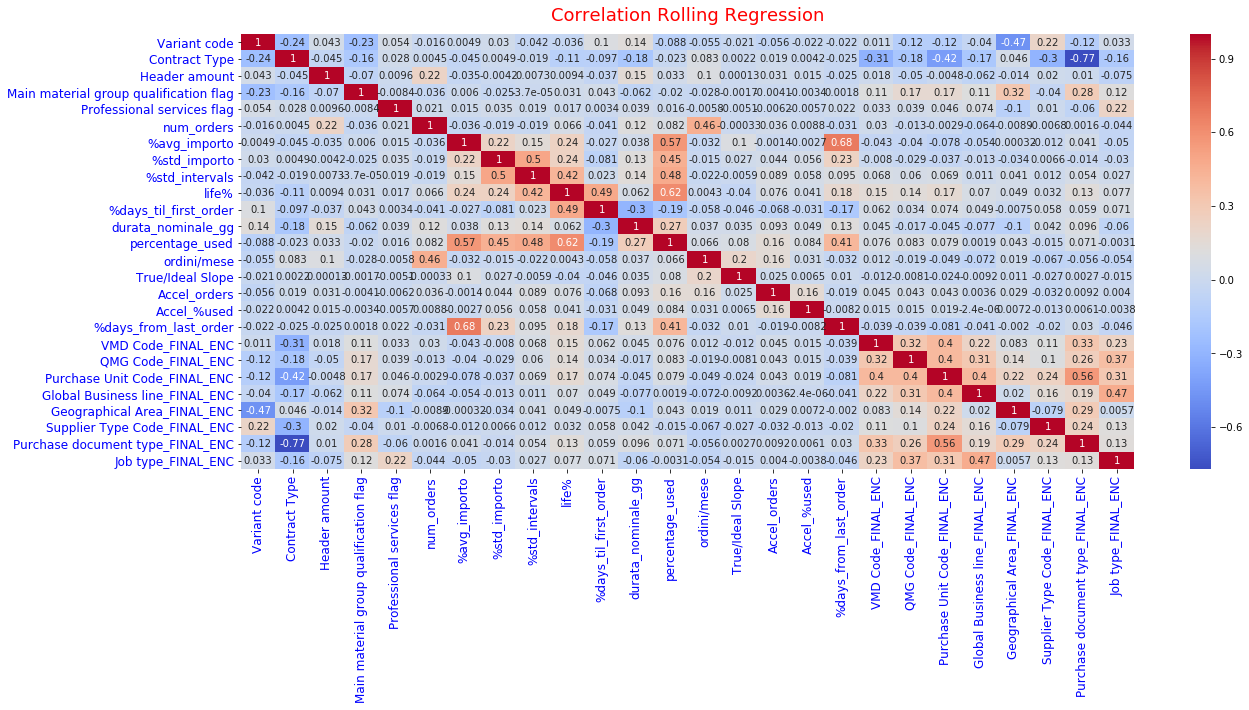

In [13]:
if DUMMIES== True:
    df= container_25['X_test'].iloc[: , 7:]
else:
    df= cont_reg['X_train']

title_ticks_ecc('Correlation Rolling Regression', 'b', 'c', figsize= (20, 8))
sns.heatmap(df.drop('%avg_intervals', axis=1).corr(), cmap= 'coolwarm', annot= True)

In [14]:
cont_reg['X_train'].describe().iloc[:2]

,Variant code,Contract Type,Header amount,Main material group qualification flag,Professional services flag,num_orders,%avg_importo,%std_importo,%avg_intervals,%std_intervals,life%,%days_til_first_order,durata_nominale_gg,percentage_used,ordini/mese,True/Ideal Slope,Accel_orders,Accel_%used,%days_from_last_order,VMD Code_FINAL_ENC,QMG Code_FINAL_ENC,Purchase Unit Code_FINAL_ENC,Global Business line_FINAL_ENC,Geographical Area_FINAL_ENC,Supplier Type Code_FINAL_ENC,Purchase document type_FINAL_ENC,Job type_FINAL_ENC
count,76326.000000,76326.000000,76326.000000,76326.000000,76326.000000,76326.000000,76326.000000,76326.000000,76326.000000,76326.00000,76326.000000,76326.000000,76326.000000,76326.00000,76326.000000,76326.000000,76326.000000,76326.000000,76326.000000,76326.00000,76326.000000,76326.000000,76326.000000,76326.000000,76326.00000,76326.000000,76326.000000
mean,-0.395501,0.110028,1.855785,-0.137922,0.165946,3.672125,0.975393,1.347134,0.364057,0.77355,0.086229,0.293369,0.252327,0.34024,2.662216,0.852453,0.451264,0.664566,0.828057,0.00067,-0.120438,-0.076482,-0.120115,-0.249501,-0.22811,0.078469,-0.279043


<center> <h3> Dimensionality Reduction 

In [15]:
######################## Devo Normalizzare features per applicare PCA #####################

scaler= StandardScaler()
gauss_train= scaler.fit_transform(scaled_train)
gauss_test= scaler.transform(scaled_test)

gauss_train.shape #(130240, 25)

(76326, 27)

In [16]:
pca_rolreg = PCA(n_components= scaled_train_reg.shape[1])   #per gestire meglio sparsity meglio svd di pca
"""If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select the
    number of components such that the amount of variance that needs to be
    explained is greater than the percentage specified by n_components"""

#Xtrain_reg_pca= pca_rolreg.fit_transform(gauss_train_reg)
#Xtest_reg_pca= pca_rolreg.transform(gauss_test_reg)


pca_reg = PCA(n_components= scaled_train.shape[1])   #per gestire meglio sparsity meglio svd di pca
Xtrain_pca= pca_reg.fit_transform(gauss_train)
Xtest_pca= pca_reg.transform(gauss_test)

### <font color ='blue'> Cumulative Explained Variance

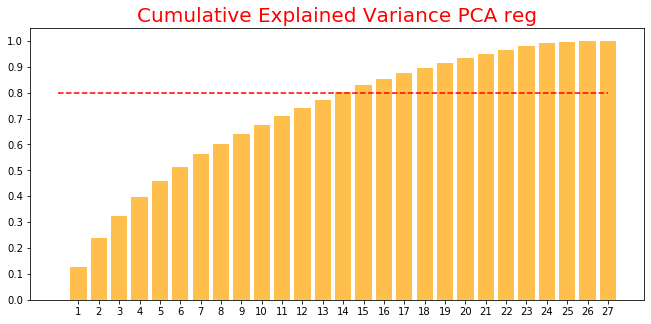

In [17]:
evr = pca_reg.explained_variance_ratio_

%matplotlib inline
fig = plt.figure(figsize=(11,5))
plt.title('Cumulative Explained Variance PCA reg', color= 'red', fontsize= 20)
plt.bar(list(map(lambda x: x+1, list(range(evr.shape[0])))), evr.cumsum(), alpha=.7, color= 'orange')
#plt.xticks(range(evr.shape[0]))
plt.xticks([int(elem) for elem in np.arange(1, scaled_train.shape[1]+1)])
plt.yticks(np.arange(0,1.1,0.1))
plt.hlines(y= 0.8, xmin= 0, xmax= evr.shape[0], colors= 'red', linestyles='dashed')
plt.show()

### <center> <a id='pca2dim'> <font color='green'> Visualizzazione plot in 2D e 3D per farmi una vaga idea della disposizione delle osservazioni nello spazio ridotto     <a href='#models'> Indice

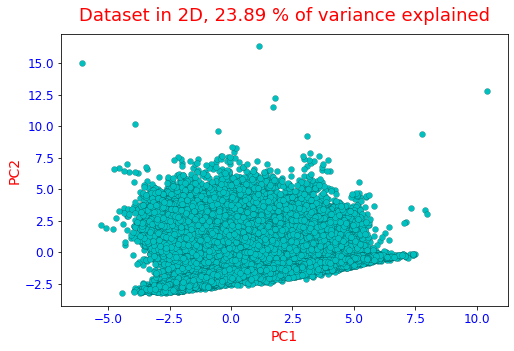

In [18]:
DISPLAY_ALL_SAMPLES = True


if DISPLAY_ALL_SAMPLES:
    n= cont_reg['X_train'].shape[0]
else: #se non voglio plottarli tutti
    n= 5000
    
title_ticks_ecc('Dataset in 2D, {} % of variance explained'.format(round(evr.cumsum()[1]*100, 2)), 'PC1', 'PC2', figsize=(8, 5))
plt.scatter(Xtrain_pca[:n, 0], Xtrain_pca[:n, 1], edgecolor='black', facecolor='c', linewidth=0.15)
plt.show()

<Figure size 720x432 with 0 Axes>

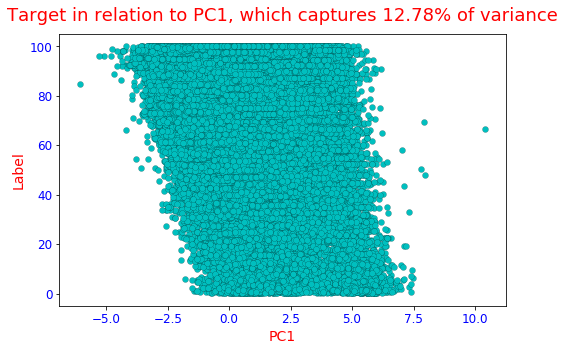

In [19]:
PLOT_INTERACTIVE= False
DISPLAY_ALL_SAMPLES = True


if DISPLAY_ALL_SAMPLES:
    n= cont_reg['X_train'].shape[0]
else: #se non voglio plottarli tutti
    n= 50000

if PLOT_INTERACTIVE:
    %matplotlib qt
    
else:
    %matplotlib inline

fig = plt.figure(figsize=(10,6))
title_ticks_ecc('Target in relation to PC1, which captures {}% of variance'.format(round(evr[0]*100, 2)), 'PC1', 'Label', figsize=(8, 5))
plt.scatter(Xtrain_pca[:n, 0], ytrain_reg[:n], edgecolor='black', facecolor='c', linewidth=0.15)

<center> <h3> Plot in 3D

No handles with labels found to put in legend.


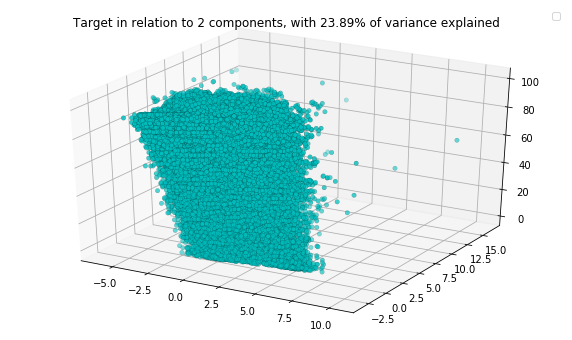

In [20]:
PLOT_INTERACTIVE= False
DISPLAY_ALL_SAMPLES = True


if DISPLAY_ALL_SAMPLES:
    n= cont_reg['X_train'].shape[0]
else: #se non voglio plottarli tutti
    n= 10000

if PLOT_INTERACTIVE:
    %matplotlib qt
    
else:
    %matplotlib inline


fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d', title='Target in relation to 2 components, with {}% of variance explained'.format(round(evr.cumsum()[1]*100, 2)))
ax.scatter3D(Xtrain_pca[:n, 0], Xtrain_pca[:n, 1], ytrain_reg[:n], edgecolor='black', facecolor='c', linewidth=0.15)
ax.legend()

### <center> <h3> T-SNE

In [22]:
RUN_CELL = False
################## in 2 dimensioni #####################

if RUN_CELL:
    tsne_reg_2 = TSNE(n_components=2, random_state=0).fit_transform(cont_reg['X_train'])
    tsne_reg_2.shape

In [23]:
RUN_CELL = False
DISPLAY_ALL_SAMPLES = False

if DISPLAY_ALL_SAMPLES:
    n= cont_reg['X_train'].shape[0]
else: #se non voglio plottarli tutti
    n= 5000
################## in 2 dimensioni #####################

if RUN_CELL:
    title_ticks_ecc('Dataset reduced in 2 dimension with t-sne', '', '')
    plt.scatter(tsne_reg_2[:n][ytrain_reg[:n]==0, 0], tsne_reg_2[:n][ytrain_reg[:n]==0, 1], label="reg 0", edgecolor='black', facecolor='c', linewidth=0.15)
    plt.scatter(tsne_reg_2[:n][ytrain_reg[:n]==1, 0], tsne_reg_2[:n][ytrain_reg[:n]==1, 1], label="reg 1", edgecolor='black', facecolor='red', linewidth=0.15)
    plt.scatter(tsne_reg_2[:n][ytrain_reg[:n]==2, 0], tsne_reg_2[:n][ytrain_reg[:n]==2, 1], label="reg 2", edgecolor='black', facecolor='orange', linewidth=0.15)
    plt.legend()

In [157]:
RUN_CELL = False
################## in 3 dimensioni #####################

if RUN_CELL:
    tsne_reg_3 = TSNE(n_components=3, random_state=0).fit_transform(cont_reg['X_train'])
    tsne_reg_3.shape

# <center> Supervised Models for Regression

In [24]:
def summary_reg_model(classifier, x_train, y_train, y_test, predizioni, trasf_target= False):
    
    print('\n\033[1mtrain MAE is {} \033[0m'.format(round(mean_absolute_error(y_train, classifier.predict(x_train)),4)))
    print('\033[1mtest MAE is {} \033[0m'.format(round(mean_absolute_error(y_test, predizioni),4)))
    
    print('\n\033[1mtrain RMSE is {} \033[0m'.format(round(np.sqrt(mean_squared_error(y_train, classifier.predict(x_train))),4)))
    print('\033[1mtest RMSE is {} \033[0m'.format(round(np.sqrt(mean_squared_error(y_test, predizioni)),4)))
    
    print('\n\033[1mtrain MAPE in %is {} \033[0m'.format(round(MAPE(y_train, classifier.predict(x_train))),4))
    print('\033[1mtest MAPE in %is {} \033[0m'.format(round(MAPE(y_test, predizioni)),4))
     
def summary_reg_grid(grid_fit, scaled_train, Y_train, scaled_test, Y_test, current_minimize= 'mae'):
    """current_minimize è inutile"""
    print('best param combination: ', grid_fit.best_params_)   #'C': 0.357
    
    #print('\n\033[1mtrain MAE is {} \033[0m'.format(round(mean_absolute_error(Y_train, grid_fit.predict(scaled_train)),4)))
    #print('\033[1mtest MAE is {} \033[0m'.format(round(mean_absolute_error(Y_test, grid_fit.predict(scaled_test)),4)))
    
    idx_max_val_score= np.argmax(grid_fit.cv_results_['mean_test_score'])
    
    # Siccome MAE è molto piu lento da minimizzare, quando algoritmi vanno lenti mi conviene minimizzare MSE e 
    # calcolare MAE a mano in corrispondenza del modello migliore trovato minimizzando MSE.
    
    print('\n\033[1mTrain MAE is {} \033[0m'.format(round(-1* grid_fit.cv_results_['mean_train_score'][idx_max_val_score],4)))
    # Validation score controllato manualmente è sempre uguale a quello dato da grid.best_score_
    #print("\n\033[1m 'MANUAL' Validation MAE \033[0m is {}):".format(round(-1*max(grid_fit.cv_results_['mean_test_score']) ,4)))
    print("\033[1mValidation MAE \033[0m (best mean CV score) is \033[1m {} \033[0m".format(round(-1*grid_fit.best_score_ ,4))) #Mean cross-validated score of the best_estimator
    
    #elif current_minimize == 'mse':
        #print('..Calculating MAE by hand for the best model on the whole Train and Test set..')
        #print('\n\033[1mTrain MAE is {} \033[0m'.format(round(mean_absolute_error(Y_train, grid_fit.predict(scaled_train)),4)))
    
    print('\033[1mTest MAE is {} \033[0m'.format(round(mean_absolute_error(Y_test, grid_fit.predict(scaled_test)),4)))
    
    print('\n\033[1mtrain RMSE is {} \033[0m'.format(round(np.sqrt(mean_squared_error(Y_train, grid_fit.predict(scaled_train))),4)))
    print('\033[1mtest RMSE is {} \033[0m'.format(round(np.sqrt(mean_squared_error(Y_test, grid_fit.predict(scaled_test))),4)))
    
    print('\n\033[1mtrain MAPE in % is {} \033[0m'.format(round(MAPE(Y_train, grid_fit.predict(scaled_train))),4))
    print('\033[1mtest MAPE in % is {} \033[0m'.format(round(MAPE(Y_test, grid_fit.predict(scaled_test))),4))

In [25]:
def run_model(estimator, task='reg', param_grid= None, only_imp= False, random= False, verbose=5, cv=3, n_jobs= None, comparison= False, show_single_mod= False,): #param_grid= None
    """estimator è il modello, task puo essere: ['reg', 'reg']. \n
    Return Grid Search estimator. """
    
    diz= cont_modello(task)
    
    X_train= diz['X_train']
    X_test= diz['X_test']
    ytrain= diz['ytrain']
    ytest= diz['ytest']
    
    if comparison== True:
        ytest= ytest_comparison_stat
        X_test= X_test_comparison_stat
    
    if only_imp== True:
        try:
            X_train= X_train_imp
            X_test= X_test_imp
        except:
            pass
    
    print('Shape di X_train e X_test sono: ', X_train.shape, X_test.shape)
    print('Shape di y_train e y_test sono: ', ytrain.shape, ytest.shape)
    temp=time.time()
    
    if param_grid is None:
        estimator.fit(X_train, ytrain)
        preds= estimator.predict(X_test)
        summary_reg_model(estimator, X_train, ytrain, ytest, preds)
        print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
        if show_single_mod==True:
            return estimator
        
    else:
        if random== False:
            Grid_RF = GridSearchCV(estimator, param_grid, scoring='neg_mean_absolute_error', cv=cv, return_train_score=True, 
                                   n_jobs= n_jobs, verbose= verbose)
            Grid_RF.fit(X_train, ytrain)
            print('\n It is not a single model but a Grid Search \n')
            summary_reg_grid(Grid_RF, X_train, ytrain, X_test, ytest)  
            print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
        
        elif random== True:
            Grid_RF = RandomizedSearchCV(estimator, param_distributions=param_grid, 
                                         scoring='neg_mean_absolute_error', cv=cv, return_train_score=True, verbose= verbose, n_jobs= n_jobs)
            Grid_RF.fit(X_train, ytrain)
            print('\n It is not a single model but a (Randomized) Grid Search \n')
            summary_reg_grid(Grid_RF, X_train, ytrain, X_test, ytest)
            print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
        return  Grid_RF  #dammi una lista in cui mi returni pure la Grid!
    
run_reg_model= run_model

In [26]:
def plot_feat_imp(task='reg', n_feat_to_plot= 10, color='r', figsize= True, show= True):
    """RETURN DF CON FEATURE IMPORTANCES ORDINATE"""
    diz= cont_modello(task)
    
    X_train= diz['X_train']
    X_test= diz['X_test']
    ytrain= diz['ytrain']
    ytest= diz['ytest']
    
    if task=='reg': 
        try: 
            print('uso "best_estimator"')
            best_est= diz['best_estimator']
        except:
            print('There is no "best_estimator" in diz')
            best_est= best_reg_rf
            
    elif task=='reg': 
        best_est= best_reg_rf
    
    feats_imp= pd.DataFrame(pd.Series(dict(zip(X_train.columns, best_est.best_estimator_.feature_importances_))), columns= ['importance'])
    feats_imp= feats_imp.sort_values(by= 'importance', ascending=False)
    
    if show== False:
        return feats_imp
    
    if figsize==True:
        feats_imp.iloc[: n_feat_to_plot]['importance'].plot.barh(color= color, edgecolor='k',figsize= (12,7),
                                      linewidth=2)
    else:
        feats_imp.iloc[: n_feat_to_plot]['importance'].plot.barh(color= color, edgecolor='k', linewidth=2)

    #plt.figure(figsize=(26,18))
    ax = plt.gca()
    ax.invert_yaxis()
    plt.xticks(size=20) 
    plt.yticks(size=18)

    plt.title('Most Important Features task {} '.format(task), size=28);
    #plt.savefig('Feature Importance RF2.png', format= 'png')
    
    return feats_imp

In [27]:
def df_cv_results (grid_fit, n_to_show= 5):
    """ MAIN CV RESULTS """
    df= pd.DataFrame(grid_fit.cv_results_)
    df= df[[col for col in df.columns if 'param_' in col]+['mean_test_score', 'mean_train_score']]
    return df.sort_values(by= 'mean_test_score', ascending= False).head(n_to_show)

<center> <font color='orange'> <h2> Random Forest  <a href='#models'>  Indice

#### Some trials

In [28]:
rf= RandomForestRegressor(n_estimators= 10, criterion= 'mse', max_depth= 5, random_state=0)

prova= run_model(rf, 'reg')   #test accuracy TP+TN/tot is 0.753, F1 train is 1.0, F1 test is 0.744 

Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)

train MAE is 15.672 
test MAE is 15.9187 

train RMSE is 20.3247 
test RMSE is 20.5208 

train MAPE in %is 117.0 
test MAPE in %is 127.0 
execution time (min)= 0.1  finished at  2019-11-25 16:26:33.437825


In [29]:
param_rf= {
    "criterion": ['mse'],
    "n_estimators" : [200],   #100
    "min_samples_leaf": [30],
     "max_depth": [5, 10],
     "max_features": [1.0]   #studi recenti hanno dimostrato che in regressione è meglio prendere tutte feats
                    }

best_reg_rf = run_reg_model(rf, 'reg', param_grid= param_rf, verbose=2, cv=2)

Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] criterion=mse, max_depth=5, max_features=1.0, min_samples_leaf=30, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=mse, max_depth=5, max_features=1.0, min_samples_leaf=30, n_estimators=200, total=  34.0s
[CV] criterion=mse, max_depth=5, max_features=1.0, min_samples_leaf=30, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.1s remaining:    0.0s


[CV]  criterion=mse, max_depth=5, max_features=1.0, min_samples_leaf=30, n_estimators=200, total=  37.2s
[CV] criterion=mse, max_depth=10, max_features=1.0, min_samples_leaf=30, n_estimators=200 
[CV]  criterion=mse, max_depth=10, max_features=1.0, min_samples_leaf=30, n_estimators=200, total=  58.4s
[CV] criterion=mse, max_depth=10, max_features=1.0, min_samples_leaf=30, n_estimators=200 
[CV]  criterion=mse, max_depth=10, max_features=1.0, min_samples_leaf=30, n_estimators=200, total= 1.1min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.2min finished



 It is not a single model but a Grid Search 

best param combination:  {'criterion': 'mse', 'max_depth': 10, 'max_features': 1.0, 'min_samples_leaf': 30, 'n_estimators': 200}

Train MAE is 13.4496 
Validation MAE  (best mean CV score) is  15.5106 
Test MAE is 14.7708 

train RMSE is 18.3358 
test RMSE is 19.4695 

train MAPE in % is 97.0 
test MAPE in % is 105.0 
execution time (min)= 5.4  finished at  2019-11-25 16:32:00.197380


In [31]:
df_cv_results(best_reg_rf)

,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,mean_test_score,mean_train_score
1,mse,10,1,30,200,-15.510587,-13.449561
0,mse,5,1,30,200,-16.475807,-15.340314


uso "best_estimator"
There is no "best_estimator" in diz


(0, 0.6)

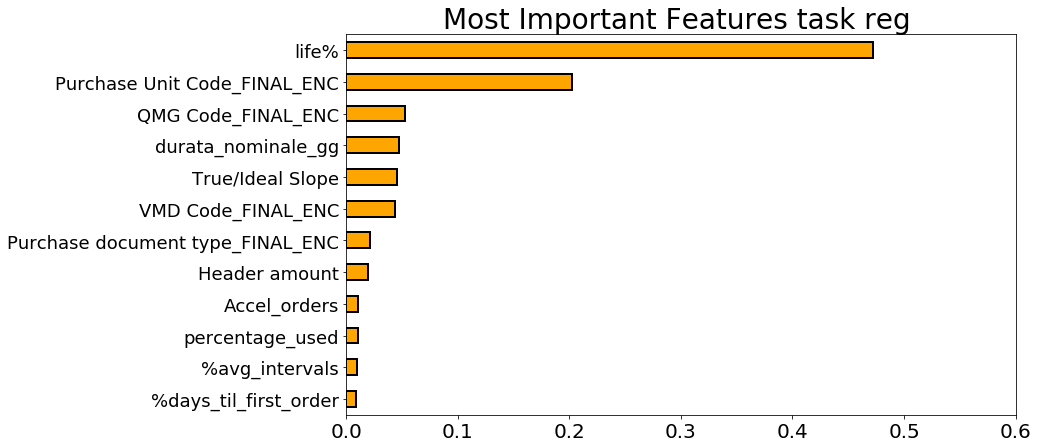

In [153]:
cont_reg['best_estimator']= best_reg_rf
feats_imp_rfreg= plot_feat_imp('reg', 12, color='orange', show= True)
plt.xlim(0, 0.6)

## <center> <h5> PCA + RF 

In [35]:
scaled_train.shape== scaled_train_reg.shape, scaled_train_reg.shape #(True, (37907, 25))

(True, (76326, 27))

In [36]:
rf= RandomForestRegressor(n_estimators= 10, criterion= 'mse', max_depth= 5, random_state=0)

pipe_pca_rf = Pipeline([
  ('reduce_dim', PCA()), ('clf', rf),
                    ])  

#####################Con SVD###################
"""pipe_pca_rf = Pipeline([('reduce_dim', TruncatedSVD()), ('clf', rf),])"""

pipe_param_pca_rf = {
    'reduce_dim__n_components': [21],
     #'clf': [SVC(), Logisticregression()],
     'clf__n_estimators' : [50, 200],
     'clf__min_samples_leaf' : [30], #10
     "clf__max_depth": [5, 10],
     "clf__max_features": [1.0]        
                    }

best_pca_rf_reg = run_model(pipe_pca_rf, 'reg', pipe_param_pca_rf, verbose=2, cv= 3)

Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] clf__max_depth=5, clf__max_features=1.0, clf__min_samples_leaf=30, clf__n_estimators=50, reduce_dim__n_components=21 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__max_depth=5, clf__max_features=1.0, clf__min_samples_leaf=30, clf__n_estimators=50, reduce_dim__n_components=21, total=  16.8s
[CV] clf__max_depth=5, clf__max_features=1.0, clf__min_samples_leaf=30, clf__n_estimators=50, reduce_dim__n_components=21 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.8s remaining:    0.0s


[CV]  clf__max_depth=5, clf__max_features=1.0, clf__min_samples_leaf=30, clf__n_estimators=50, reduce_dim__n_components=21, total=  17.2s
[CV] clf__max_depth=5, clf__max_features=1.0, clf__min_samples_leaf=30, clf__n_estimators=50, reduce_dim__n_components=21 
[CV]  clf__max_depth=5, clf__max_features=1.0, clf__min_samples_leaf=30, clf__n_estimators=50, reduce_dim__n_components=21, total=  17.2s
[CV] clf__max_depth=5, clf__max_features=1.0, clf__min_samples_leaf=30, clf__n_estimators=200, reduce_dim__n_components=21 
[CV]  clf__max_depth=5, clf__max_features=1.0, clf__min_samples_leaf=30, clf__n_estimators=200, reduce_dim__n_components=21, total= 1.1min
[CV] clf__max_depth=5, clf__max_features=1.0, clf__min_samples_leaf=30, clf__n_estimators=200, reduce_dim__n_components=21 
[CV]  clf__max_depth=5, clf__max_features=1.0, clf__min_samples_leaf=30, clf__n_estimators=200, reduce_dim__n_components=21, total= 1.1min
[CV] clf__max_depth=5, clf__max_features=1.0, clf__min_samples_leaf=30, clf

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 10.7min finished



 It is not a single model but a Grid Search 

best param combination:  {'clf__max_depth': 10, 'clf__max_features': 1.0, 'clf__min_samples_leaf': 30, 'clf__n_estimators': 200, 'reduce_dim__n_components': 21}

Train MAE is 14.0097 
Validation MAE  (best mean CV score) is  16.0542 
Test MAE is 15.3294 

train RMSE is 18.7076 
test RMSE is 19.9605 

train MAPE in % is 103.0 
test MAPE in % is 113.0 
execution time (min)= 13.5  finished at  2019-11-25 16:45:31.695220


## <center>  <a id='rf_feats_imp'> <font color= 'orange'> Feature Importance  <a href= #models> Indice

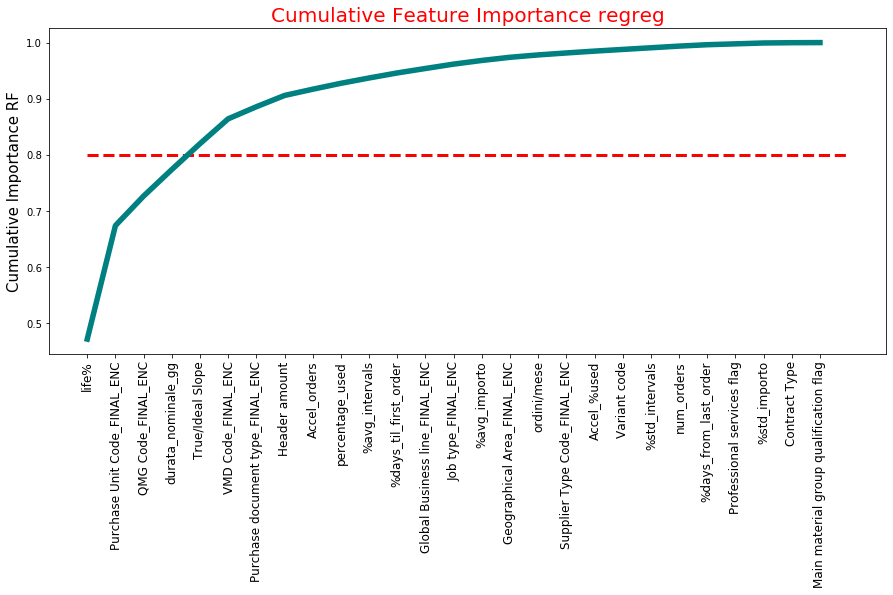

In [37]:
cumulative_importances = np.cumsum(feats_imp_rfreg)
plt.figure(figsize=(15,6))
plt.plot(list(feats_imp_rfreg.index), cumulative_importances,'teal', lw=5.5 )
plt.title('Cumulative Feature Importance regreg', color= 'red', fontsize=20)
plt.hlines(y = 0.80, xmin=0, xmax=len(feats_imp_rfreg.importance), color = 'r', linestyles = 'dashed', lw=3 )
# Format x ticks and labels
plt.xticks(list(range(len(feats_imp_rfreg.importance))), feats_imp_rfreg.index, rotation = 'vertical',fontsize= 12 )
#plt.xlabel('Variable'); 
plt.ylabel('Cumulative Importance RF', fontsize=15); #plt.title('CUMULATIVE IMPORTANCES', fontsize=20)
#plt.savefig('Cumulative Feature importantce Importance', format= 'png')

In [38]:
feats= cumulative_importances[cumulative_importances['importance']<0.90].index
feats

rf= RandomForestRegressor(**best_reg_rf.best_params_)
X_train_imp= cont_reg['X_train'][feats]
X_test_imp= cont_reg['X_test'][feats]

run_model(rf, 'reg', only_imp= True, verbose=2, cv= 3)

Shape di X_train e X_test sono:  (76326, 7) (13270, 7)
Shape di y_train e y_test sono:  (76326,) (13270,)

train MAE is 14.1002 
test MAE is 15.0068 

train RMSE is 18.7514 
test RMSE is 19.6739 

train MAPE in %is 100.0 
test MAPE in %is 107.0 
execution time (min)= 0.8  finished at  2019-11-25 16:46:18.846863


In [39]:
best_reg_rf.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 1.0,
 'min_samples_leaf': 30,
 'n_estimators': 200}

In [40]:
param_grid= {'criterion': ['mse'],   #sono parametri migliori per rf di prima
 'max_depth': [10],
 'max_features': [1.0],
 'min_samples_leaf': [30],
 'n_estimators': [300]}

rf_only_imp= run_model(rf, 'reg', param_grid= param_grid, only_imp= True, verbose=2, cv= 3)

Shape di X_train e X_test sono:  (76326, 7) (13270, 7)
Shape di y_train e y_test sono:  (76326,) (13270,)
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] criterion=mse, max_depth=10, max_features=1.0, min_samples_leaf=30, n_estimators=300 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=mse, max_depth=10, max_features=1.0, min_samples_leaf=30, n_estimators=300, total=  40.5s
[CV] criterion=mse, max_depth=10, max_features=1.0, min_samples_leaf=30, n_estimators=300 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.5s remaining:    0.0s


[CV]  criterion=mse, max_depth=10, max_features=1.0, min_samples_leaf=30, n_estimators=300, total=  41.1s
[CV] criterion=mse, max_depth=10, max_features=1.0, min_samples_leaf=30, n_estimators=300 
[CV]  criterion=mse, max_depth=10, max_features=1.0, min_samples_leaf=30, n_estimators=300, total=  41.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.1min finished



 It is not a single model but a Grid Search 

best param combination:  {'criterion': 'mse', 'max_depth': 10, 'max_features': 1.0, 'min_samples_leaf': 30, 'n_estimators': 300}

Train MAE is 13.9778 
Validation MAE  (best mean CV score) is  15.5201 
Test MAE is 15.0073 

train RMSE is 18.7438 
test RMSE is 19.6741 

train MAPE in % is 100.0 
test MAPE in % is 107.0 
execution time (min)= 3.3  finished at  2019-11-25 16:49:34.084750


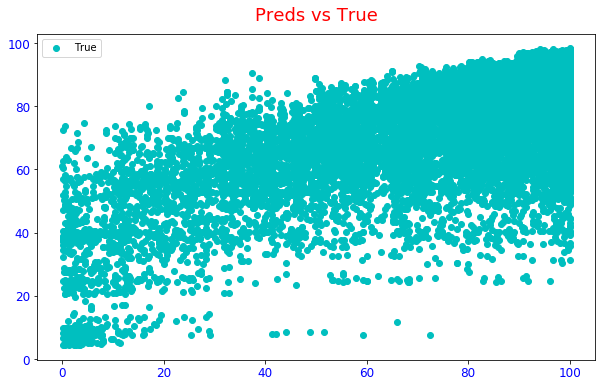

In [41]:
ytrue= pd.Series(cont_reg['ytest'].values, index= np.arange(len(cont_reg['ytest'])))
ypred_rf= pd.Series(rf_only_imp.predict(cont_reg['X_test'][feats]), index= np.arange(len(cont_reg['ytest'])))

title_ticks_ecc('Preds vs True', '' , '')
plt.scatter(ytrue,ypred_rf, color='c', label= 'True')
plt.legend()

# <center> Feature Selection Lasso-RF

**Here C is the inverse of regularization strength.**<br> <br>
**SelectFromModel: If None and if the estimator has a parameter penalty set to l1, either explicitly or implicitly (e.g, Lasso), the threshold used is 1e-5**

In [42]:
"""In Regressione, aumentanto alpha aumenta penalità"""

lasso= SelectFromModel(estimator= Lasso(alpha=0.1 )).fit(cont_reg['X_train'], ytrain_reg)

try: 
    l= []
    for j in range (23):
            l.append(np.mean([lasso.estimator_.coef_[0][j], lasso.estimator_.coef_[1][j], lasso.estimator_.coef_[2][j]  ]))
    l=np.array(l)
except:
    pass

print('Initial features =', cont_reg['X_train'].shape[1])
print('Selected features lasso =',sum(lasso.get_support()))
#print('Selected featureslasso4 =',sum(lasso4.get_support()))
print('features with coefficients shrank to zero in lasso(non sempre esatto) =', np.sum(l == 0))
#pd.Series(l).describe().loc[['mean', 'max']]

Initial features = 27
Selected features lasso = 23
features with coefficients shrank to zero in lasso(non sempre esatto) = 0


In [44]:
#cont_reg= cont_modello('rego')
cont_reg['best_estimator']= best_reg_rf

cont_reg.keys(), cont_reg.keys()

(dict_keys(['X_train', 'X_test', 'ytrain', 'ytest', 'best_estimator']),
 dict_keys(['X_train', 'X_test', 'ytrain', 'ytest', 'best_estimator']))

In [45]:
def reduced_models(valori_C, task= 'reg', poly_feats= False, degree= 2):
    """ RETURN DUE DATAFRAME: 'modelli_ridotti' con valori di C e n_feats per ognuno,
    l'altro df con % permanenza features in vari steps"""
    ###############################################
    diz= cont_modello(task)
    X_train= diz['X_train']
    X_test= diz['X_test']
    ytrain= diz['ytrain']
    ytest= diz['ytest']
    
    if poly_feats== True:
        X_train= PolynomialFeatures(degree= degree).fit_transform(X_train)
        X_test= PolynomialFeatures(degree= degree).fit_transform(X_test)
    
    """if task=='regreg': 
        best_est= best_reg_rf
    elif task=='reg75': 
        best_est= best_75_rf
    elif task=='rego': 
        best_est= best_reg_rf"""
    #################################################  
    
    reduced_lasso = {}
    cronologia_lasso= {}
    len_val_C= 0
    
    for c in valori_C:
        if task== 'class':
            lasso= SelectFromModel( LogisticRegression(C= c, random_state= 0))
        elif task== 'reg':
            lasso= SelectFromModel( Lasso(alpha= c, random_state= 0))
            
        lasso.fit(X_train, ytrain)
        reduced_lasso[c]= [sum(lasso.get_support()), lasso.get_support()]
        
        if poly_feats== False:  #sennò non ho i nomi delle colonne
            feats= X_train.columns[lasso.get_support()]

            if len(feats)!= X_train.shape[1]:
                len_val_C +=1

                for feat in feats: 
                    if feat not in cronologia_lasso:
                        cronologia_lasso[feat]=1
                    else:
                        cronologia_lasso[feat]+=1
        
    for col in cronologia_lasso:
        cronologia_lasso[col]= round(cronologia_lasso[col]*100/len_val_C, 2)
        
    if poly_feats== False:  #sennò non ho i nomi delle colonne
        for col in cronologia_lasso:
            cronologia_lasso[col]= round(cronologia_lasso[col]*100/len_val_C, 2)
            
        cronologia_lasso= pd.Series(cronologia_lasso).sort_values(ascending=False)
        index_sorted= cronologia_lasso.index
        values= cronologia_lasso.values
        cronologia_lasso=  (values - cronologia_lasso.values.min()) / (values - values.min()).sum()
        cronologia_lasso= pd.Series(data= cronologia_lasso, index= index_sorted)
        
    n_feats= [reduced_lasso[c][0] for c in valori_C]

    reduced_lasso= pd.DataFrame(n_feats, columns= ['n_feats_selected'], index= valori_C)
    reduced_lasso= reduced_lasso.drop_duplicates(keep='first').sort_values(by= 'n_feats_selected')

    print('Initial features per modello {}='.format(task), X_train.shape[1]) 
    
    return {'modelli_ridotti': reduced_lasso, 'cronologia_lasso': cronologia_lasso}

In [46]:
reduced_lasso_reg= reduced_models(list(np.linspace(0.1, 2, 5)))
reduced_lasso_reg['modelli_ridotti']

Initial features per modello reg= 27


,n_feats_selected
2.000,11
1.525,13
1.050,15
0.575,18
0.100,23


In [48]:
def scores_from_grid(grid_fittata, show= True):
    val_scores = list()
    train_scores= list()
    
    if show== False:
        for mean_score, params in zip(grid_fittata.cv_results_["mean_test_score"], grid_fittata.cv_results_["params"]):
            val_scores.append(mean_score*100)

        for mean_score, params in zip(grid_fittata.cv_results_["mean_train_score"], grid_fittata.cv_results_["params"]):
            train_scores.append(mean_score*100)
    
        return {'val_scores': val_scores, 'train_scores': train_scores}
        
    #######################################################################    
    #start_time = time.time()
    print('\t\tVALIDATION SCORES\n')
    for mean_score, params in zip(grid_fittata.cv_results_["mean_test_score"], grid_fittata.cv_results_["params"]):
        val_scores.append(mean_score*100)
        print('{} --> F1-weighted {}%'.format(params, round(mean_score*100,3)))

    print('\n\t\tTRAINING SCORES\n')
    
    for mean_score, params in zip(grid_fittata.cv_results_["mean_train_score"], grid_fittata.cv_results_["params"]):
        train_scores.append(mean_score*100)
        print('{} --> F1-weighted {}%'.format(params, round(mean_score*100,3)))

    print('\nBest parameters in CV: {} \nBest F1-weighted on training: {}%'.format(grid_fittata.best_params_,round(100*grid_fittata.best_score_,3)))
    
    return {'val_scores': val_scores, 'train_scores': train_scores}

In [49]:
                                        """Pipelines con GridSearch"""


###################### regreg  #####################
pipe_sel_rfreg = Pipeline([
  ('feat_sel', SelectFromModel( Lasso(alpha= 0.01, random_state= 0))),
  ('rf',  best_reg_rf.best_estimator_)
                    ])

pipe_param_gridreg = {
    'feat_sel__estimator__alpha': list(reduced_lasso_reg['modelli_ridotti'].index),
                    }

## <center> Lasso + RF

In [50]:
reduced_lasso_reg['modelli_ridotti']

,n_feats_selected
2.000,11
1.525,13
1.050,15
0.575,18
0.100,23


In [51]:
cont_modello('reg')['ytrain'].shape

(76326,)

In [52]:
lasso_rfreg= run_model(pipe_sel_rfreg, task='reg', param_grid= pipe_param_gridreg, verbose=2, cv=2)

Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] feat_sel__estimator__alpha=2.0 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... feat_sel__estimator__alpha=2.0, total=  25.3s
[CV] feat_sel__estimator__alpha=2.0 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.7s remaining:    0.0s


[CV] ................... feat_sel__estimator__alpha=2.0, total=  22.8s
[CV] feat_sel__estimator__alpha=1.525 ................................
[CV] ................. feat_sel__estimator__alpha=1.525, total=  25.9s
[CV] feat_sel__estimator__alpha=1.525 ................................
[CV] ................. feat_sel__estimator__alpha=1.525, total=  30.7s
[CV] feat_sel__estimator__alpha=1.05 .................................
[CV] .................. feat_sel__estimator__alpha=1.05, total=  32.9s
[CV] feat_sel__estimator__alpha=1.05 .................................
[CV] .................. feat_sel__estimator__alpha=1.05, total=  38.1s
[CV] feat_sel__estimator__alpha=0.575 ................................
[CV] ................. feat_sel__estimator__alpha=0.575, total=  37.4s
[CV] feat_sel__estimator__alpha=0.575 ................................
[CV] ................. feat_sel__estimator__alpha=0.575, total=  48.6s
[CV] feat_sel__estimator__alpha=0.1 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.2min finished



 It is not a single model but a Grid Search 

best param combination:  {'feat_sel__estimator__alpha': 0.575}

Train MAE is 13.5608 
Validation MAE  (best mean CV score) is  15.4538 
Test MAE is 14.8338 

train RMSE is 18.4836 
test RMSE is 19.5521 

train MAPE in % is 98.0 
test MAPE in % is 106.0 
execution time (min)= 7.8  finished at  2019-11-25 16:57:24.161789


In [53]:
df_cv_results(lasso_rfreg)

,param_feat_sel__estimator__alpha,mean_test_score,mean_train_score
3,0.575,-15.453818,-13.560799
2,1.05,-15.464072,-13.635135
4,0.1,-15.503489,-13.472273
1,1.525,-15.543922,-13.727727
0,2,-15.613071,-13.905922


In [54]:
#scores_lasso_cv_75 = scores_from_grid(lasso_rf75, show= False)
scores_lasso_cv_reg = scores_from_grid(lasso_rfreg, show= True) 

n_feats_kept_reg= [reduced_lasso_reg['modelli_ridotti'].iloc[i][0] for i in range(len(reduced_lasso_reg['modelli_ridotti']))]

		VALIDATION SCORES

{'feat_sel__estimator__alpha': 2.0} --> F1-weighted -1561.307%
{'feat_sel__estimator__alpha': 1.525} --> F1-weighted -1554.392%
{'feat_sel__estimator__alpha': 1.05} --> F1-weighted -1546.407%
{'feat_sel__estimator__alpha': 0.575} --> F1-weighted -1545.382%
{'feat_sel__estimator__alpha': 0.1} --> F1-weighted -1550.349%

		TRAINING SCORES

{'feat_sel__estimator__alpha': 2.0} --> F1-weighted -1390.592%
{'feat_sel__estimator__alpha': 1.525} --> F1-weighted -1372.773%
{'feat_sel__estimator__alpha': 1.05} --> F1-weighted -1363.514%
{'feat_sel__estimator__alpha': 0.575} --> F1-weighted -1356.08%
{'feat_sel__estimator__alpha': 0.1} --> F1-weighted -1347.227%

Best parameters in CV: {'feat_sel__estimator__alpha': 0.575} 
Best F1-weighted on training: -1545.382%


#### <center> Plot Lasso + RF performances at varying penalization

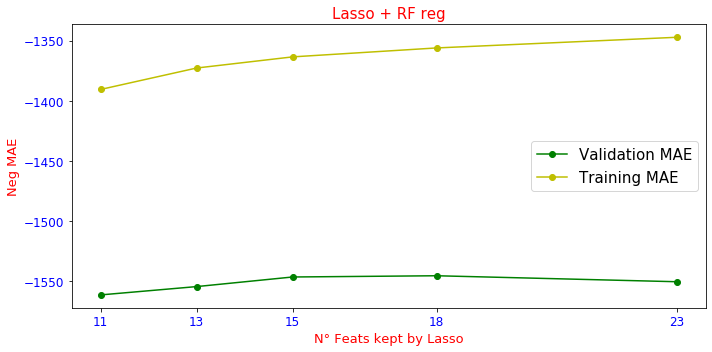

In [56]:
task= ['reg']
n_feats_kept= [n_feats_kept_reg]
scores_lasso= [scores_lasso_cv_reg]

plt.figure(figsize=(10, 5))

for i in range(1):
    plt.subplot(1,1,i+1)
    plt.plot(n_feats_kept[i], scores_lasso[i]['val_scores'],'g-o', label='Validation MAE')
    plt.plot(n_feats_kept[i], scores_lasso[i]['train_scores'], 'y-o', label='Training MAE')
    plt.ylabel('Neg MAE', color='red', fontsize= 13)
    plt.xlabel('N° Feats kept by Lasso', color='red', fontsize= 13)
    plt.title('Lasso + RF {}'.format(task[i]), fontsize= 15, color='red')
    plt.xticks(n_feats_kept[i], fontsize= 12, color='blue')
    plt.yticks(fontsize= 12, color='blue')
    plt.legend(fontsize=15)
    #plt.ylim(73,82)
    plt.tight_layout()
    
plt.tight_layout()
plt.show()

In [57]:
#cronologia_lasso75= reduced_lasso_75['cronologia_lasso']
cronologia_lasso_reg= reduced_lasso_reg['cronologia_lasso']

In [60]:
cronologie = dict(cronologia_lasso_reg)

for col in cronologie.keys():    
    if col in cronologia_lasso_reg:
        cronologie[col]= cronologie[col]+ [cronologia_lasso_reg[col]]
    else:
        cronologie[col]= cronologie[col] + [0]
        
    if col in cronologia_lasso_reg:
        cronologie[col]= cronologie[col]+ [cronologia_lasso_reg[col]]
    else:
        cronologie[col]= cronologie[col]+ [0]
        
cronologie = pd.DataFrame(cronologie).T
cronologie.columns= ['lasso_reg']

cronologie.head(15)

,lasso_reg
ordini/mese,0.214286
VMD Code_FINAL_ENC,0.214286
%std_intervals,0.214286
life%,0.214286
True/Ideal Slope,0.214286
%days_from_last_order,0.214286
Accel_%used,0.214286
QMG Code_FINAL_ENC,0.214286
Purchase Unit Code_FINAL_ENC,0.214286
Header amount,0.214286


In [61]:
cronologie['RF_reg']= list(map(lambda x: round(x[0],2), 
                        np.array(cronologie.index.map(feats_imp_rfreg.squeeze().to_dict())).reshape(-1,1)))


cronologie['RF_reg'].fillna(0, inplace=True)

cronologie.sort_values(by='RF_reg', ascending=False, inplace= True)
cronologie.head(5)

,lasso_reg,RF_reg
life%,0.214286,0.47
Purchase Unit Code_FINAL_ENC,0.214286,0.20
True/Ideal Slope,0.214286,0.05
QMG Code_FINAL_ENC,0.214286,0.05
durata_nominale_gg,0.160714,0.05


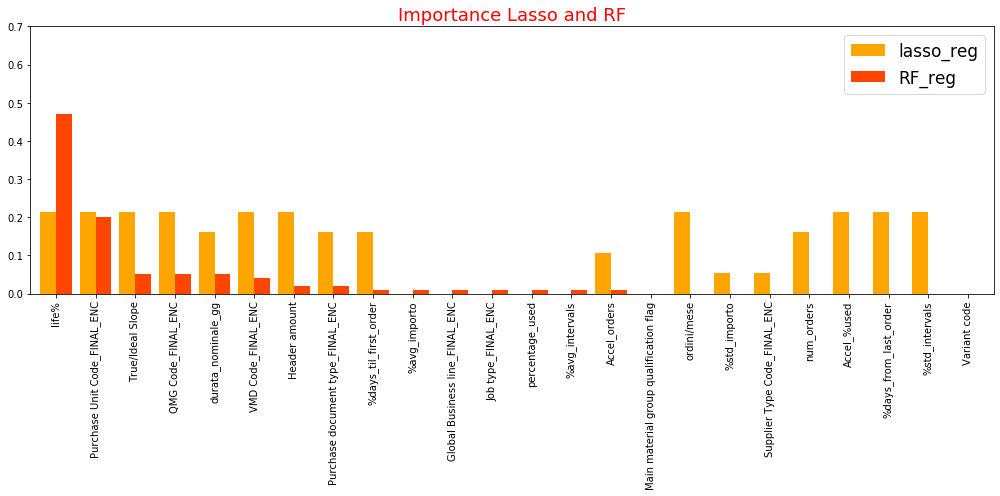

In [62]:
RUN_CELL= True
if RUN_CELL:
    fig, ax= plt.subplots(1,1, figsize=(14,7))
    plt.title('Importance Lasso and RF', color='red', fontsize=18)
    cronologie.plot(kind="bar", ax=ax, width= 0.8, colors= ['orange', 'orangered', 'skyblue', 'c'])
    fig.tight_layout()
    ax.set_ylim(0, 0.7)
    ax.legend(fontsize=17)
    fig.show()

### <center> <h3> Linear regression

In [63]:
from sklearn.linear_model import LinearRegression

cont_reg['X_train'].sample(2)

,Variant code,Contract Type,Header amount,Main material group qualification flag,Professional services flag,num_orders,%avg_importo,%std_importo,%avg_intervals,%std_intervals,life%,%days_til_first_order,durata_nominale_gg,percentage_used,ordini/mese,True/Ideal Slope,Accel_orders,Accel_%used,%days_from_last_order,VMD Code_FINAL_ENC,QMG Code_FINAL_ENC,Purchase Unit Code_FINAL_ENC,Global Business line_FINAL_ENC,Geographical Area_FINAL_ENC,Supplier Type Code_FINAL_ENC,Purchase document type_FINAL_ENC,Job type_FINAL_ENC
Purchase document,,,,,,,,,,,,,,,,,,,,,,,,,,,
EL\5600009237,-1.0,0.0,2.430315,0.0,0.0,1.0,1.413897,14.068568,-0.214962,2.663574,0.25,0.432318,-0.059063,1.349224,1.378049,1.531312,0.0,0.0,3.285259,-0.041507,0.370024,0.390260,0.841109,0.370727,0.073027,0.697497,0.260884
EL\5600012846,-1.0,0.0,4.806772,0.0,0.0,-0.2,-0.057640,0.000000,1.219832,0.000000,0.00,1.069397,-0.140530,-0.155730,-0.121951,-0.355348,0.0,0.0,-0.065705,-0.149775,-0.267731,0.177367,-1.001654,0.066181,-0.644593,0.760083,-1.014169


In [64]:
"""In Regressione, aumentanto alpha aumenta penalità"""

lasso= SelectFromModel(estimator= Lasso(alpha=1 )).fit(cont_reg['X_train'], ytrain_reg)

try: 
    l= []
    for j in range (23):
            l.append(np.mean([lasso.estimator_.coef_[0][j], lasso.estimator_.coef_[1][j], lasso.estimator_.coef_[2][j]  ]))
    l=np.array(l)
except:
    pass

print('Initial features =', cont_reg['X_train'].shape[1])
print('Selected features lasso =',sum(lasso.get_support()))
#print('Selected featureslasso4 =',sum(lasso4.get_support()))
print('features with coefficients shrank to zero in lasso(non sempre esatto) =', np.sum(l == 0))
#pd.Series(l).describe().loc[['mean', 'max']]

Initial features = 27
Selected features lasso = 15
features with coefficients shrank to zero in lasso(non sempre esatto) = 0


In [65]:
reduced_lasso_reg['modelli_ridotti']

,n_feats_selected
2.000,11
1.525,13
1.050,15
0.575,18
0.100,23


In [66]:
lasso= Lasso(random_state=0)  # fit_intercept= True di deafult, quindi apposto V

###################### ROLLING75  #####################
pipe_sel_linreg = Pipeline([
  ('feat_sel', SelectFromModel(lasso)),
  ('linear_reg',  LinearRegression())
                    ])

pipe_param_linreg = {
    'feat_sel__estimator__alpha': list(reduced_lasso_reg['modelli_ridotti'].index)}


best_lasso_linreg = run_reg_model(pipe_sel_linreg, 'reg', pipe_param_linreg)

Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] feat_sel__estimator__alpha=2.0 ..................................
[CV]  feat_sel__estimator__alpha=2.0, score=(train=-17.508, test=-17.156), total=   0.1s
[CV] feat_sel__estimator__alpha=2.0 ..................................
[CV]  feat_sel__estimator__alpha=2.0, score=(train=-17.757, test=-16.780), total=   0.1s
[CV] feat_sel__estimator__alpha=2.0 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  feat_sel__estimator__alpha=2.0, score=(train=-16.509, test=-19.019), total=   0.1s
[CV] feat_sel__estimator__alpha=1.525 ................................
[CV]  feat_sel__estimator__alpha=1.525, score=(train=-17.321, test=-16.746), total=   0.1s
[CV] feat_sel__estimator__alpha=1.525 ................................
[CV]  feat_sel__estimator__alpha=1.525, score=(train=-17.544, test=-16.401), total=   0.1s
[CV] feat_sel__estimator__alpha=1.525 ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV]  feat_sel__estimator__alpha=1.525, score=(train=-16.381, test=-18.900), total=   0.1s
[CV] feat_sel__estimator__alpha=1.05 .................................
[CV]  feat_sel__estimator__alpha=1.05, score=(train=-17.318, test=-16.744), total=   0.1s
[CV] feat_sel__estimator__alpha=1.05 .................................
[CV]  feat_sel__estimator__alpha=1.05, score=(train=-17.544, test=-16.401), total=   0.1s
[CV] feat_sel__estimator__alpha=1.05 .................................
[CV]  feat_sel__estimator__alpha=1.05, score=(train=-16.231, test=-18.806), total=   0.1s
[CV] feat_sel__estimator__alpha=0.575 ................................
[CV]  feat_sel__estimator__alpha=0.575, score=(train=-17.309, test=-16.742), total=   0.1s
[CV] feat_sel__estimator__alpha=0.575 ................................
[CV]  feat_sel__estimator__alpha=0.575, score=(train=-17.497, test=-16.368), total=   0.1s
[CV] feat_sel__estimator__alpha=0.575 ................................
[CV]  feat_sel__estimator__alph

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.4s finished



 It is not a single model but a Grid Search 

best param combination:  {'feat_sel__estimator__alpha': 0.1}

Train MAE is 16.7541 
Validation MAE  (best mean CV score) is  17.1181 
Test MAE is 17.078 

train RMSE is 21.209 
test RMSE is 21.4233 

train MAPE in % is 137.0 
test MAPE in % is 147.0 
execution time (min)= 0.0  finished at  2019-11-25 16:57:27.166400


### <center> MAE at varying penalty, Lasso e Ridge

In [67]:
df_results= df_cv_results(best_lasso_linreg)
df_results

,param_feat_sel__estimator__alpha,mean_test_score,mean_train_score
4,0.1,-17.118096,-16.754066
2,1.05,-17.317375,-17.031377
3,0.575,-17.333585,-16.997077
1,1.525,-17.349201,-17.081929
0,2,-17.651720,-17.257940


In [ ]:
dd = df_results['param_feat_sel__estimator__alpha']
X_axis = np.array(dd)

mn = 10000
mx = 0

title_ticks_ecc('a', 'b', 'c')
for sample, style in (('train', '--'), ('test', '-')):
    for pen in ('l1', 'l2'):
        diz= {'l1': 'Lasso', 'l2': 'Ridge'}
        diz2={'train': 'Train', 'test': 'Validation'}
        dd = df_results[df_results.param_feat_sel__estimator__alpha== pen]
        mean = dd['mean_%s_score' % (sample)]
        #std = dd['std_%s_score' % (sample)]
        #plt.fill_between(X_axis, mean-std, mean+std,alpha=0.3 if sample == 'test' else 0, color=color)
        plt.plot(X_axis, mean, style,
                alpha=1 if sample == 'test' else 0.7,
                label="penalty %s (%s)" % (diz[pen], diz2[sample]))
        mn = min(mn, min(mean-std))
        mx = max(mx, max(mean+std))
scores = np.array(dd['mean_test_score'])
best_index = scores.argmax()
best_score = scores[best_index]
print('best param', X_axis[best_index])
plt.plot([X_axis[best_index], ] * 2, [0, best_score],
        linestyle='-.', marker='x', markeredgewidth=3, ms=8)

plt.annotate("%0.3f" % best_score, (X_axis[best_index], best_score + 0.002))

    
plt.xlabel("$C$")
plt.ylabel("F1- Weighted")

#plt.xlim(0, 0.006)
plt.ylim(mn, mx)
plt.legend()
plt.title("Scores for train and validation sets", fontsize=14)
plt.show()

In [ ]:
#######################################################################################################################

## <center>Lasso + Polynomial Regression

In [75]:
from sklearn.preprocessing import PolynomialFeatures
#if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are 
#[1, a, b, a^2, ab, b^2]

In [76]:
reduced_lasso_poly= reduced_models(list(np.linspace(1, 3, 3)), task='reg', poly_feats= True, degree=2)
reduced_lasso_poly['modelli_ridotti']

Initial features per modello reg= 406


,n_feats_selected
3.0,46
2.0,55
1.0,78


In [77]:
print("N° feats created with degree=2: ", PolynomialFeatures(degree = 2).fit_transform(scaled_train).shape[1])

N° feats created with degree=2:  406


In [78]:
np.linspace(0.1, 0.1, 1)

array([0.1])

In [79]:
print("N° feats created with degree=3: ", PolynomialFeatures(degree = 3).fit_transform(scaled_train).shape[1])

N° feats created with degree=3:  4060


In [80]:
reduced_lasso_poly3= reduced_models(list(np.linspace(3, 4, 1)), task='reg', poly_feats= True, degree=3)
reduced_lasso_poly3['modelli_ridotti']

Initial features per modello reg= 4060


,n_feats_selected
3.0,270


In [81]:
# Fitting Polynomial Regression to the dataset

poly_reg = PolynomialFeatures(degree = 2)
lasso= Lasso(random_state=0)  # fit_intercept= True di deafult, quindi apposto V

pipe_sel_polyreg = Pipeline([
  ('poly_feats', poly_reg),
  ('feat_sel', SelectFromModel(lasso)),
  ('linear_reg',  LinearRegression())
                    ])

pipe_param_polyreg = [
    {'poly_feats__degree': [1], 'feat_sel__estimator__alpha': list(reduced_lasso_reg['modelli_ridotti'].index)} ,
    {'poly_feats__degree': [2], 'feat_sel__estimator__alpha': list(reduced_lasso_poly['modelli_ridotti'].index)},]
    #{'poly_feats__degree': [3], 'feat_sel__estimator__alpha': list(reduced_lasso_poly3['modelli_ridotti'].index)}
                        #]

best_lasso_polyreg = run_reg_model(pipe_sel_polyreg, 'reg', pipe_param_polyreg, verbose= 2)

Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] feat_sel__estimator__alpha=2.0, poly_feats__degree=1 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  feat_sel__estimator__alpha=2.0, poly_feats__degree=1, total=   0.2s
[CV] feat_sel__estimator__alpha=2.0, poly_feats__degree=1 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  feat_sel__estimator__alpha=2.0, poly_feats__degree=1, total=   0.2s
[CV] feat_sel__estimator__alpha=2.0, poly_feats__degree=1 ............
[CV]  feat_sel__estimator__alpha=2.0, poly_feats__degree=1, total=   0.1s
[CV] feat_sel__estimator__alpha=1.525, poly_feats__degree=1 ..........
[CV]  feat_sel__estimator__alpha=1.525, poly_feats__degree=1, total=   0.2s
[CV] feat_sel__estimator__alpha=1.525, poly_feats__degree=1 ..........
[CV]  feat_sel__estimator__alpha=1.525, poly_feats__degree=1, total=   0.2s
[CV] feat_sel__estimator__alpha=1.525, poly_feats__degree=1 ..........
[CV]  feat_sel__estimator__alpha=1.525, poly_feats__degree=1, total=   0.1s
[CV] feat_sel__estimator__alpha=1.05, poly_feats__degree=1 ...........
[CV]  feat_sel__estimator__alpha=1.05, poly_feats__degree=1, total=   0.1s
[CV] feat_sel__estimator__alpha=1.05, poly_feats__degree=1 ...........
[CV]  feat_sel__estimator__alpha=1.05, poly_feats__degree=1, total=   0.1s
[CV] feat_sel__estimator__alpha=1.05, poly_feats

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.9min finished



 It is not a single model but a Grid Search 

best param combination:  {'feat_sel__estimator__alpha': 1.0, 'poly_feats__degree': 2}

Train MAE is 15.8823 
Validation MAE  (best mean CV score) is  16.528 
Test MAE is 16.2993 

train RMSE is 20.5415 
test RMSE is 20.7968 

train MAPE in % is 120.0 
test MAPE in % is 128.0 
execution time (min)= 2.3  finished at  2019-11-25 17:07:40.345341


In [82]:
df_cv_results(best_lasso_polyreg, 15)

,param_feat_sel__estimator__alpha,param_poly_feats__degree,mean_test_score,mean_train_score
7,1,2,-16.527960,-15.882348
4,0.1,1,-17.118096,-16.754066
6,2,2,-17.175759,-16.427407
2,1.05,1,-17.317375,-17.031377
3,0.575,1,-17.333585,-16.997077
1,1.525,1,-17.349201,-17.081929
5,3,2,-17.623430,-16.817118
0,2,1,-17.651720,-17.257940


### SGD Regressor

In [83]:
pipe_pca_sgd = Pipeline([
  ('clf', SGDRegressor(loss= 'squared_loss', random_state=0)),
                    ])  

#####################Con SVD###################
"""pipe_pca_rf = Pipeline([('reduce_dim', TruncatedSVD()), ('clf', rf),])"""

pipe_param_pca_sgd = {
    'clf__alpha': [1e-07, 1e-10, 1e-13, 1e-15],  
    'clf__penalty': ['l1', 'l2'],
    'clf__loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
                    }

best_pca_sgd = run_reg_model(pipe_pca_sgd, 'reg', pipe_param_pca_sgd, verbose=2, cv= 3)

Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] clf__alpha=1e-07, clf__loss=squared_loss, clf__penalty=l1 .......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__alpha=1e-07, clf__loss=squared_loss, clf__penalty=l1, total=   0.3s
[CV] clf__alpha=1e-07, clf__loss=squared_loss, clf__penalty=l1 .......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__alpha=1e-07, clf__loss=squared_loss, clf__penalty=l1, total=   0.5s
[CV] clf__alpha=1e-07, clf__loss=squared_loss, clf__penalty=l1 .......
[CV]  clf__alpha=1e-07, clf__loss=squared_loss, clf__penalty=l1, total=   0.3s
[CV] clf__alpha=1e-07, clf__loss=squared_loss, clf__penalty=l2 .......
[CV]  clf__alpha=1e-07, clf__loss=squared_loss, clf__penalty=l2, total=   0.2s
[CV] clf__alpha=1e-07, clf__loss=squared_loss, clf__penalty=l2 .......
[CV]  clf__alpha=1e-07, clf__loss=squared_loss, clf__penalty=l2, total=   0.3s
[CV] clf__alpha=1e-07, clf__loss=squared_loss, clf__penalty=l2 .......
[CV]  clf__alpha=1e-07, clf__loss=squared_loss, clf__penalty=l2, total=   0.4s
[CV] clf__alpha=1e-07, clf__loss=huber, clf__penalty=l1 ..............
[CV]  clf__alpha=1e-07, clf__loss=huber, clf__penalty=l1, total=   2.3s
[CV] clf__alpha=1e-07, clf__loss=huber, clf__penalty=l1 ..............
[CV]  clf__alpha=1e-07, clf__loss=huber, clf__penalty=l1, total=   2.4s
[CV] clf__alpha=1e-07, clf__loss=hu

[CV]  clf__alpha=1e-13, clf__loss=huber, clf__penalty=l1, total=   2.4s
[CV] clf__alpha=1e-13, clf__loss=huber, clf__penalty=l1 ..............
[CV]  clf__alpha=1e-13, clf__loss=huber, clf__penalty=l1, total=   2.6s
[CV] clf__alpha=1e-13, clf__loss=huber, clf__penalty=l1 ..............
[CV]  clf__alpha=1e-13, clf__loss=huber, clf__penalty=l1, total=   2.3s
[CV] clf__alpha=1e-13, clf__loss=huber, clf__penalty=l2 ..............
[CV]  clf__alpha=1e-13, clf__loss=huber, clf__penalty=l2, total=   1.6s
[CV] clf__alpha=1e-13, clf__loss=huber, clf__penalty=l2 ..............
[CV]  clf__alpha=1e-13, clf__loss=huber, clf__penalty=l2, total=   1.8s
[CV] clf__alpha=1e-13, clf__loss=huber, clf__penalty=l2 ..............
[CV]  clf__alpha=1e-13, clf__loss=huber, clf__penalty=l2, total=   1.7s
[CV] clf__alpha=1e-13, clf__loss=epsilon_insensitive, clf__penalty=l1 
[CV]  clf__alpha=1e-13, clf__loss=epsilon_insensitive, clf__penalty=l1, total=   1.2s
[CV] clf__alpha=1e-13, clf__loss=epsilon_insensitive, cl

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:  1.6min finished



 It is not a single model but a Grid Search 

best param combination:  {'clf__alpha': 1e-07, 'clf__loss': 'epsilon_insensitive', 'clf__penalty': 'l2'}

Train MAE is 16.7991 
Validation MAE  (best mean CV score) is  17.2817 
Test MAE is 17.3133 

train RMSE is 22.481 
test RMSE is 22.2922 

train MAPE in % is 150.0 
test MAPE in % is 162.0 
execution time (min)= 1.6  finished at  2019-11-25 17:09:15.348980


In [84]:
##############################################################################################

## <center> K-Nearest-Neighbors

In [199]:
# 'n_neighbors': 2000, 'p': 1, 'weights': 'uniform' >> F1 TRAIN SCORE: 0.679, F1 TEST SCORE: 0.685
# {'n_neighbors': 2000, 'p': 2, 'weights': 'distance'} >> F1 TRAIN SCORE: 1.0, F1 TEST SCORE: 0.662
#{'n_neighbors': 1000, 'p': 1, 'weights': 'distance'} >> F1 TRAIN SCORE: 1.0, F1 TEST SCORE: 0.711
# {'n_neighbors': 2, 'p': 1, 'weights': 'distance'} >> F1 TRAIN SCORE: 0.999, F1 TEST SCORE: 0.743


knn = KNeighborsRegressor(weights='uniform')
param_grid_knn = {
    'n_neighbors': [1, 2, 5, 10, 20], #50, 30
    'weights': ['uniform'], #'distance']
    'metric': ['euclidean', 'manhattan'],  #'mahalanobis'
    #'p':[1,2]   #SUPER IMP: è INUTILE METTERE P: A P=1 CORRISPONDE Manhattan Distance, a P=2 Eucledian
            }
    
knn_reg= run_model(knn, 'reg', param_grid_knn, verbose=5, cv= 5)

knn_reg_results= df_cv_results(knn_reg, n_to_show= 10)
knn_reg_results

,param_metric,param_n_neighbors,param_weights,mean_test_score,mean_train_score
9,manhattan,20,uniform,0.710995,0.740663
7,manhattan,5,uniform,0.708272,0.801875
8,manhattan,10,uniform,0.707052,0.757047
4,euclidean,20,uniform,0.699970,0.731947
2,euclidean,5,uniform,0.699093,0.795851
3,euclidean,10,uniform,0.695221,0.748260
5,manhattan,1,uniform,0.680289,1.000000
6,manhattan,2,uniform,0.671953,0.826209
0,euclidean,1,uniform,0.665238,1.000000
1,euclidean,2,uniform,0.659270,0.817612


### <center> Knn performance al variare di N° Neighbors

In [281]:
best_knn_reg= knn_reg
knn_reg_results= df_cv_results(knn_reg, n_to_show=15)
knn_reg_results

,param_metric,param_n_neighbors,param_weights,mean_test_score,mean_train_score
8,manhattan,10,uniform,-0.232499,-0.209746
9,manhattan,20,uniform,-0.232606,-0.220857
3,euclidean,10,uniform,-0.234560,-0.211912
4,euclidean,20,uniform,-0.234653,-0.223241
7,manhattan,5,uniform,-0.234960,-0.190917
2,euclidean,5,uniform,-0.237348,-0.193176
6,manhattan,2,uniform,-0.248937,-0.139497
1,euclidean,2,uniform,-0.254701,-0.141409
5,manhattan,1,uniform,-0.279299,0.000000
0,euclidean,1,uniform,-0.282174,0.000000


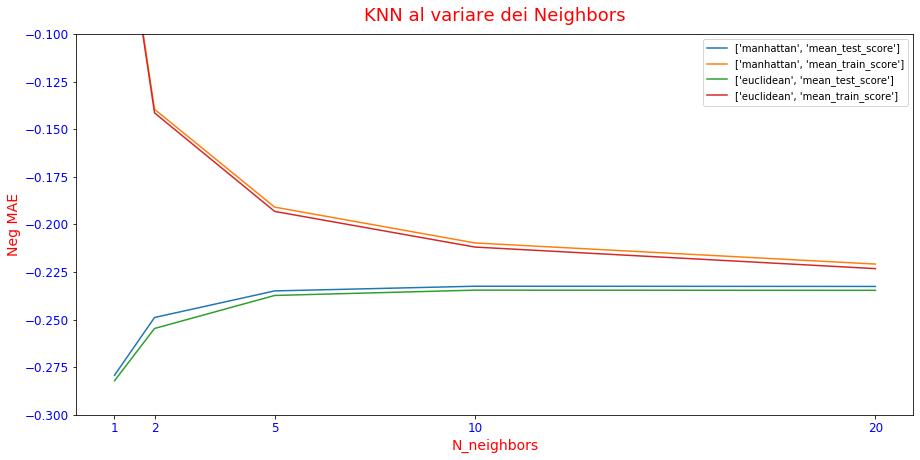

In [280]:
%matplotlib inline

#colors = ['blue', 'green', 'red', 'orange']
count=0

title_ticks_ecc('KNN al variare dei Neighbors', 'N_neighbors', 'Neg MAE', figsize= (15,7))
for metric in ['manhattan', 'euclidean']:
    for score in ['mean_test_score', 'mean_train_score']: #
        sub_df= knn_reg_results[knn_reg_results['param_metric']== metric][['param_n_neighbors',score]]. sort_values(by= 'param_n_neighbors')
        plt.plot(sub_df.set_index('param_n_neighbors'), label= [metric, score], ) #color= colors[count]
        plt.legend()
        plt.xticks([int(n) for n in sub_df['param_n_neighbors']])
        plt.ylim(-0.3, -0.1)
        
        count+=1

### <center> PCA + KNN

In [87]:
pipe_pca_knn = Pipeline([
             ('scaler', StandardScaler()),('reduce_dim', PCA()), ('clf', knn),
                    ])  

#####################Con SVD, viene uguale ###################
"""pipe_pca_rf = Pipeline([('reduce_dim', TruncatedSVD()), ('clf', rf),])"""

pipe_param_pca_knn = {
    'reduce_dim__n_components': [12, 20], #12
     'clf__n_neighbors': [10, 30, 50],
     'clf__metric': ['euclidean', 'manhattan'],
     'clf__weights': ['uniform'],          
                    }

best_pca_knn_reg = run_model(pipe_pca_knn, 'reg', pipe_param_pca_knn, verbose=2, cv= 2)

Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] clf__metric=euclidean, clf__n_neighbors=10, clf__weights=uniform, reduce_dim__n_components=12 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__metric=euclidean, clf__n_neighbors=10, clf__weights=uniform, reduce_dim__n_components=12, total=   8.5s
[CV] clf__metric=euclidean, clf__n_neighbors=10, clf__weights=uniform, reduce_dim__n_components=12 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.8s remaining:    0.0s


[CV]  clf__metric=euclidean, clf__n_neighbors=10, clf__weights=uniform, reduce_dim__n_components=12, total=   8.1s
[CV] clf__metric=euclidean, clf__n_neighbors=10, clf__weights=uniform, reduce_dim__n_components=20 
[CV]  clf__metric=euclidean, clf__n_neighbors=10, clf__weights=uniform, reduce_dim__n_components=20, total=  23.9s
[CV] clf__metric=euclidean, clf__n_neighbors=10, clf__weights=uniform, reduce_dim__n_components=20 
[CV]  clf__metric=euclidean, clf__n_neighbors=10, clf__weights=uniform, reduce_dim__n_components=20, total=  28.2s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.0min finished



 It is not a single model but a Grid Search 

best param combination:  {'clf__metric': 'euclidean', 'clf__n_neighbors': 10, 'clf__weights': 'uniform', 'reduce_dim__n_components': 12}

Train MAE is 12.9876 
Validation MAE  (best mean CV score) is  17.3828 
Test MAE is 15.6768 

train RMSE is 17.9704 
test RMSE is 20.7796 

train MAPE in % is 88.0 
test MAPE in % is 99.0 
execution time (min)= 2.6  finished at  2019-11-25 18:23:39.162971


### <center> Knn reg

In [203]:
pipe_param_pca_knn = {
    'reduce_dim__n_components': [13],
     'clf__n_neighbors': [30, 50],
     'clf__metric': ['euclidean', 'manhattan'],
     'clf__weights': ['uniform'],          
                    }

best_pca_knn_reg = run_model(pipe_pca_knn, 'rego', pipe_param_pca_knn, verbose=2, cv= 3)

Shape di X_train e X_test sono:  (34379, 13) (6068, 13)
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] clf__metric=euclidean, clf__n_neighbors=30, clf__weights=uniform, reduce_dim__n_components=13 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__metric=euclidean, clf__n_neighbors=30, clf__weights=uniform, reduce_dim__n_components=13, total=   3.3s
[CV] clf__metric=euclidean, clf__n_neighbors=30, clf__weights=uniform, reduce_dim__n_components=13 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s


[CV]  clf__metric=euclidean, clf__n_neighbors=30, clf__weights=uniform, reduce_dim__n_components=13, total=   3.3s
[CV] clf__metric=euclidean, clf__n_neighbors=30, clf__weights=uniform, reduce_dim__n_components=13 
[CV]  clf__metric=euclidean, clf__n_neighbors=30, clf__weights=uniform, reduce_dim__n_components=13, total=   3.2s
[CV] clf__metric=euclidean, clf__n_neighbors=50, clf__weights=uniform, reduce_dim__n_components=13 
[CV]  clf__metric=euclidean, clf__n_neighbors=50, clf__weights=uniform, reduce_dim__n_components=13, total=   3.7s
[CV] clf__metric=euclidean, clf__n_neighbors=50, clf__weights=uniform, reduce_dim__n_components=13 
[CV]  clf__metric=euclidean, clf__n_neighbors=50, clf__weights=uniform, reduce_dim__n_components=13, total=   3.7s
[CV] clf__metric=euclidean, clf__n_neighbors=50, clf__weights=uniform, reduce_dim__n_components=13 
[CV]  clf__metric=euclidean, clf__n_neighbors=50, clf__weights=uniform, reduce_dim__n_components=13, total=   3.6s
[CV] clf__metric=manhatta

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.3min finished



 Train Accuracy is 0.73
 Test Accuracy is 0.724 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.72      0.80      0.76      3289
           2       0.73      0.64      0.68      2779

    accuracy                           0.72      6068
   macro avg       0.72      0.72      0.72      6068
weighted avg       0.72      0.72      0.72      6068

CONFUSION MATRIX 
 [[2620  669]
 [1004 1775]]

ROC train is 0.7247089767728546, ROC test is 0.7176568366470896 

F1 TRAIN: 0.729, 
VALIDATION F1 (averaged on 5 folds): 0.714  
F1 TEST: 0.722
execution time (min)= 3.4  finished at  2019-10-02 13:02:32.833292


## <center> <h3> SVM

https://scikit-learn.org/stable/modules/svm.html#svm

*Kernel cache size: For SVC, SVR, NuSVC and NuSVR, the size of the kernel cache has a strong impact on run times for larger problems. If you have enough RAM available, it is recommended to set cache_size to a higher value than the default of 200(MB), such as 500(MB) or 1000(MB).
Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it. It corresponds to regularize more the estimation*

## <center> SVM Linear 

In [21]:
RUN_CELL= False

#parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'), 'C':(1, 10, 100),'gamma': (0.001, 0.0001,'auto'),'shrinking':(True,False)}

if RUN_CELL:
    svm = SVC(reg_weight = 'balanced')   #  #va sempre messo, perchè regi non bilanciate. 'ovr' di default
    param_grid_svm = [
      {'C': [0.00001], 'kernel': ['linear']},]
      #{'C': [0.001, 0.01, 1], 'kernel': ['poly']}, {'C': [0.001, 0.01, 1], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']}]


    svm_reg_linear= run_model(svm, 'reg', param_grid_svm, n_jobs= 2)

#### <center> PCA + SVM Linear

In [245]:
""" QUANDO USO PCA DEVO NORMALIZZARE DATI CON SCALER """

RUN_CELL= True
if RUN_CELL:

    pipe_pca_linear = Pipeline([
    ('reduce_dim', PCA()), ('clf', SVR(kernel= 'linear', cache_size= 1000)),
                        ])  

    #####################Con SVD, stessi risultati###################
    """pipe_pca_rf = Pipeline([('reduce_dim', TruncatedSVD()), ('clf', rf),])"""

    pipe_param_pca_linear_reg = {
        'reduce_dim__n_components': [10], #
        #'clf': [SVC(kernel= 'linear'), LogisticRegression()],
         'clf__C': [1],          #0.1
                        }

    best_pca_svm_reg = run_model(pipe_pca_linear, 'reg', pipe_param_pca_linear_reg, verbose=5, cv= 3, n_jobs= 1)

Shape di X_train e X_test sono:  (14493, 14) (2558, 14)
Shape di y_train e y_test sono:  (14493,) (2558,)
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] clf__C=1, reduce_dim__n_components=10 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__C=1, reduce_dim__n_components=10, score=(train=-0.246, test=-0.251), total=  38.3s
[CV] clf__C=1, reduce_dim__n_components=10 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.9s remaining:    0.0s


[CV]  clf__C=1, reduce_dim__n_components=10, score=(train=-0.249, test=-0.244), total=  34.0s
[CV] clf__C=1, reduce_dim__n_components=10 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV]  clf__C=1, reduce_dim__n_components=10, score=(train=-0.248, test=-0.249), total=  26.8s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished



 It is not a single model but a Grid Search 

best param combination:  {'clf__C': 1, 'reduce_dim__n_components': 10}

Train MAE is 0.2476 
Validation MAE  (best mean CV score) is  0.2481 
Test MAE is 0.2477 

train RMSE is 0.3041 
test RMSE is 0.3027 

train MAPE is inf 
test MAPE is inf 
execution time (min)= 2.8  finished at  2019-11-08 12:29:10.030752


In [24]:
### Lasso + SVM: it does not make really sense doing LAsso since SVM has already its own regularization parameter

RUN_CELL=False
if RUN_CELL:
    pipe_lasso_svm = Pipeline([
      ('lasso', SelectFromModel(LogisticRegression(penalty='l1' ,random_state=0) )), 
        ('clf', SVC(kernel= 'linear', random_state=0, cache_size= 1000, reg_weight='balanced')),
                        ])

    pipe_lasso_svm_reg = {
        'lasso__estimator__C': [0.001217],  #14 feats. provato 0.01, list(reduced_lasso_reg['modelli_ridotti'].index
         'clf__C': [1,10], #provati 20, 30, 50
         #'clf__gamma': [0.001, 1, 10]  #1, 3, 5, 10 --> 10
            }

    best_lasso_svm_reg = run_model(pipe_lasso_svm, 'regreg', pipe_lasso_svm_reg, cv=3)

### <center> SVM Kernel RBF

In [254]:
RUN_CELL= True

if RUN_CELL:
    pipe_lasso_svm = Pipeline([
      ('lasso', SelectFromModel(Lasso(alpha= alpha) )), 
        ('clf', SVR(kernel= 'rbf', cache_size= 1000)),
                        ])

    pipe_lasso_svm_reg = {
        'lasso__estimator__alpha': [0.01, 0.001],  #provato 0.01, list(reduced_lasso_reg['modelli_ridotti'].index, 
         'clf__C': [1], #provati 20, 30, 50
         #'clf__gamma': [0.001, 1, 10]  #1, 3, 5, 10 --> 10
            }

    best_rbf_svm_reg = run_model(pipe_lasso_svm, 'reg', pipe_lasso_svm_reg, cv=3)

Shape di X_train e X_test sono:  (14493, 14) (2558, 14)
Shape di y_train e y_test sono:  (14493,) (2558,)
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] clf__C=1, lasso__estimator__alpha=0.01 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__C=1, lasso__estimator__alpha=0.01, score=(train=-0.216, test=-0.233), total=   3.2s
[CV] clf__C=1, lasso__estimator__alpha=0.01 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  clf__C=1, lasso__estimator__alpha=0.01, score=(train=-0.217, test=-0.228), total=   3.1s
[CV] clf__C=1, lasso__estimator__alpha=0.01 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.3s remaining:    0.0s


[CV]  clf__C=1, lasso__estimator__alpha=0.01, score=(train=-0.218, test=-0.230), total=   3.2s
[CV] clf__C=1, lasso__estimator__alpha=0.001 .........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.5s remaining:    0.0s


[CV]  clf__C=1, lasso__estimator__alpha=0.001, score=(train=-0.208, test=-0.231), total=   3.9s
[CV] clf__C=1, lasso__estimator__alpha=0.001 .........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   17.8s remaining:    0.0s


[CV]  clf__C=1, lasso__estimator__alpha=0.001, score=(train=-0.208, test=-0.227), total=   4.0s
[CV] clf__C=1, lasso__estimator__alpha=0.001 .........................
[CV]  clf__C=1, lasso__estimator__alpha=0.001, score=(train=-0.211, test=-0.229), total=   3.7s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   28.2s finished



 It is not a single model but a Grid Search 

best param combination:  {'clf__C': 1, 'lasso__estimator__alpha': 0.001}

Train MAE is 0.2092 
Validation MAE  (best mean CV score) is  0.2291 
Test MAE is 0.2243 

train RMSE is 0.2758 
test RMSE is 0.2938 

train MAPE is inf 
test MAPE is inf 
execution time (min)= 0.7  finished at  2019-11-08 12:44:01.019453


In [255]:
df_cv_results(best_lasso_svm_reg)

,param_clf__C,param_lasso__estimator__alpha,mean_test_score,mean_train_score
1,1,0.001,-0.229137,-0.209189
0,1,0.01,-0.230121,-0.217094


#### <center> PCA + SVM Gaussian

In [256]:
RUN_CELL= False
if RUN_CELL:

    pipe_lasso_svm = Pipeline([
      ('scaler', StandardScaler()), ('reduce_dim', PCA()), 
        ('clf', SVC(kernel= 'rbf', random_state=0, cache_size= 1000, reg_weight='balanced')),
                        ])

    pipe_lasso_svm_reg = {
        'reduce_dim__n_components': [13],
         'clf__C': [10],
         #'clf__gamma': [0.001, 1, 10]  #1, 3, 5, 10 --> 10
            }

    best_lasso_svm_reg = run_model(pipe_lasso_svm, 'reg', pipe_lasso_svm_reg, cv=3)

#### <center> Bagging + SVM (to make it run faster)

In [29]:
from sklearn.ensemble import Baggingregifier

RUN_CELL= False
if RUN_CELL==True:

    pipe_bag_svm75 = Pipeline([
      ('bagging_svm', Baggingregifier(base_estimator= SVC(C=0.1, kernel='rbf', probability=True, 
                        reg_weight = 'balanced', random_state=0, verbose=1))),
                        ])

    pipe_param_grid_bag_svm_reg = {
        'bagging_svm__base_estimator__C': [0.001, 1],
        'bagging_svm__n_estimators': [10, 30]
                        }


    bagging_svm_reg=  run_model(pipe_bag_svmreg, 'regreg', pipe_param_grid_bag_svm_reg)

# <center> <h3> Gradient Boosting

In [ ]:
gb_old= GradientBoostingRegressor(random_state=0)

param_gb_old=  {
    'n_estimators': [150],
    #"min_impurity_decrease" :  [1e-02, 1e-05],
    "max_depth": [1, 3],
    'learning_rate': [0.1, 0.01] 
}

best_gb_old = run_reg_model(gb_old, 'reg', param_grid= param_gb_old, verbose= 2)

#### <center>PCA + Gradient Boosting

In [220]:
pipe_pca_gb = Pipeline([
  ('reduce_dim', PCA()), ('clf', GradientBoostingRegressor(random_state=0)),
                    ])  

#####################Con SVD###################
"""pipe_pca_rf = Pipeline([('reduce_dim', TruncatedSVD()), ('clf', rf),])"""

pipe_param_pca_gb = {
    'reduce_dim__n_components': [10],
     'clf__n_estimators': [50, 200], 
    'clf__max_depth': [1, 3],
    'clf__learning_rate': [0.1]
                    }

best_pca_gb = run_model(pipe_pca_gb, 'reg', pipe_param_pca_gb, verbose=2, cv= 3)

Shape di X_train e X_test sono:  (14493, 14) (2558, 14)
Shape di y_train e y_test sono:  (14493,) (2558,)
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=50, reduce_dim__n_components=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=50, reduce_dim__n_components=10, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=50, reduce_dim__n_components=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=50, reduce_dim__n_components=10, total=   0.2s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=50, reduce_dim__n_components=10 
[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=50, reduce_dim__n_components=10, total=   0.2s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=200, reduce_dim__n_components=10 
[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=200, reduce_dim__n_components=10, total=   0.5s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=200, reduce_dim__n_components=10 
[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=200, reduce_dim__n_components=10, total=   0.5s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=200, reduce_dim__n_components=10 
[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=200, reduce_dim__n_components=10, total=   0.5s
[CV] clf__learning_rate=0.1, clf__max

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    8.0s finished



 It is not a single model but a Grid Search 

best param combination:  {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 200, 'reduce_dim__n_components': 10}

Train MAE is 0.2218 
Validation MAE  (best mean CV score) is  0.2399 
Test MAE is 0.236 

train RMSE is 0.2781 
test RMSE is 0.2925 

train MAPE is inf 
test MAPE is inf 
execution time (min)= 0.2  finished at  2019-11-07 18:27:59.534889


### <center> XGBRFRegressor

In [221]:
gb_rf= XGBRFRegressor(n_estimators= 300, random_state=0)  #multi:softmax 

param_gb_rf= {
    "learning rate": [0.1, 0.01],
    "n_estimators" : [50, 200], #100
    "reg_alpha": [0.7], 
    "reg_lambda":[0.8],
    "max depth": [1, 3]
                }


best_gbrf = run_reg_model(gb_rf, 'reg', param_grid= param_gb_rf)

Shape di X_train e X_test sono:  (14493, 14) (2558, 14)
Shape di y_train e y_test sono:  (14493,) (2558,)
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] learning rate=0.1, max depth=1, n_estimators=50, reg_alpha=0.7, reg_lambda=0.8 
[18:27:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning rate=0.1, max depth=1, n_estimators=50, reg_alpha=0.7, reg_lambda=0.8, score=(train=-0.254, test=-0.259), total=   0.3s
[CV] learning rate=0.1, max depth=1, n_estimators=50, reg_alpha=0.7, reg_lambda=0.8 
[18:27:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  learning rate=0.1, max depth=1, n_estimators=50, reg_alpha=0.7, reg_lambda=0.8, score=(train=-0.255, test=-0.255), total=   0.3s
[CV] learning rate=0.1, max depth=1, n_estimators=50, reg_alpha=0.7, reg_lambda=0.8 
[18:28:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  learning rate=0.1, max depth=1, n_estimators=50, reg_alpha=0.7, reg_lambda=0.8, score=(train=-0.254, test=-0.256), total=   0.3s
[CV] learning rate=0.1, max depth=1, n_estimators=200, reg_alpha=0.7, reg_lambda=0.8 
[18:28:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s


[CV]  learning rate=0.1, max depth=1, n_estimators=200, reg_alpha=0.7, reg_lambda=0.8, score=(train=-0.254, test=-0.258), total=   1.1s
[CV] learning rate=0.1, max depth=1, n_estimators=200, reg_alpha=0.7, reg_lambda=0.8 
[18:28:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s


[CV]  learning rate=0.1, max depth=1, n_estimators=200, reg_alpha=0.7, reg_lambda=0.8, score=(train=-0.255, test=-0.255), total=   1.1s
[CV] learning rate=0.1, max depth=1, n_estimators=200, reg_alpha=0.7, reg_lambda=0.8 
[18:28:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning rate=0.1, max depth=1, n_estimators=200, reg_alpha=0.7, reg_lambda=0.8, score=(train=-0.254, test=-0.256), total=   1.2s
[CV] learning rate=0.1, max depth=3, n_estimators=50, reg_alpha=0.7, reg_lambda=0.8 
[18:28:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning rate=0.1, max depth=3, n_estimators=50, reg_alpha=0.7, reg_lambda=0.8, score=(train=-0.254, test=-0.259), total=   0.3s
[CV] learning rate=0.1, max depth=3, n_estimators=50, reg_alpha=0.7, reg_lambda=0.8 
[18:28:04

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   18.3s finished



 It is not a single model but a Grid Search 

best param combination:  {'learning rate': 0.1, 'max depth': 1, 'n_estimators': 200, 'reg_alpha': 0.7, 'reg_lambda': 0.8}

Train MAE is 0.2543 
Validation MAE  (best mean CV score) is  0.2567 
Test MAE is 0.2547 

train RMSE is 0.3014 
test RMSE is 0.3018 

train MAPE is inf 
test MAPE is inf 
execution time (min)= 0.3  finished at  2019-11-07 18:28:19.572775


### <center>Lasso/PCA + XGB (Best Boosting)

In [92]:
############## Prova ##############
lasso= SelectFromModel(estimator= Lasso(alpha=0.01 )).fit(cont_reg['X_train'], ytrain_reg)

print('Initial features =', cont_reg['X_train'].shape[1])
print('Selected features lasso =',sum(lasso.get_support()))

Initial features = 27
Selected features lasso = 26


In [93]:
reduced_lasso_reg['modelli_ridotti'].sample(3, random_state=2)

,n_feats_selected
1.050,15
0.100,23
1.525,13


In [95]:
pipe_pca_boost = Pipeline([
          ('reduce_dim', PCA()), 
          ('clf', XGBRegressor(random_state=0, min_child_weight= 1, subsample=0.8)),
                    ])

pipe_param_boost = [{  # Primo dizionario: PCA
    'reduce_dim': [PCA()],
    'reduce_dim__n_components': [10],
    'clf__n_estimators': [100],
    'clf__min_child_weight' :  [1],  #1e-02, 
    'clf__max_depth': [1,3],
    'clf__learning_rate': [0.5, 0.005],},            
    # Secondo dizionario: Lasso
    {'reduce_dim': [SelectFromModel(Lasso())],
    'reduce_dim__estimator__alpha': list(reduced_lasso_reg['modelli_ridotti'].sample(3, random_state=2).index),   #20 features
     'clf__n_estimators': [100],
     'clf__min_child_weight' :  [1],  #1e-02, 
     'clf__max_depth': [1,3],
     'clf__learning_rate': [0.5, 0.005],}
                ]


best_pca_boost_reg= run_model(pipe_pca_boost, 'reg', pipe_param_boost)

df_cv_results(best_pca_boost_reg)

,param_clf__learning_rate,param_clf__max_depth,param_clf__min_child_weight,param_clf__n_estimators,param_reduce_dim,param_reduce_dim__n_components,param_reduce_dim__estimator__alpha,mean_test_score,mean_train_score
8,0.5,3,1,100,"SelectFromModel(estimator=Lasso(alpha=0.1, cop...",NaN,0.1,-15.814342,-13.622699
7,0.5,3,1,100,"SelectFromModel(estimator=Lasso(alpha=0.1, cop...",NaN,1.05,-16.008224,-13.748481
9,0.5,3,1,100,"SelectFromModel(estimator=Lasso(alpha=0.1, cop...",NaN,1.525,-16.089336,-13.731228
1,0.5,3,1,100,"PCA(copy=True, iterated_power='auto', n_compon...",10,NaN,-16.505704,-14.754500
5,0.5,1,1,100,"SelectFromModel(estimator=Lasso(alpha=0.1, cop...",NaN,0.1,-16.981565,-16.130950


### <center> Best Boosting reg

In [96]:
xgb= XGBRegressor(random_state=0)  #multi:softmax , booster [default=gbtree], tree booster here because it always outperforms the linear booster and thus the later is rarely used.

#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

param_xgb= {
    "learning rate": [0.1,], #0.05
    "n_estimators" : [150], 
    "reg_alpha": [0.7], 
    "reg_lambda":[0.8],
    "max depth": [1],  #3
    'min_child_weight': [1],  #Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree. Too high values can lead to under-fitting hence, it should be tuned using CV.
    'gamma': [0],
    'colsample_bytree': [0.8],
    'scale_pos_weight': [1],
    'subsample': [0.8]
                }

best_xgb = run_model(xgb, 'reg', param_grid= param_xgb)

Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] colsample_bytree=0.8, gamma=0, learning rate=0.1, max depth=1, min_child_weight=1, n_estimators=150, reg_alpha=0.7, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8 
[18:28:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.8, gamma=0, learning rate=0.1, max depth=1, min_child_weight=1, n_estimators=150, reg_alpha=0.7, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8, score=(train=-14.805, test=-14.918), total=  10.8s
[CV] colsample_bytree=0.8, gamma=0, learning rate=0.1, max depth=1, min_child_weight=1, n_estimators=150, reg_alpha=0.7, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8 
[18:28:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s remaining:    0.0s


[CV]  colsample_bytree=0.8, gamma=0, learning rate=0.1, max depth=1, min_child_weight=1, n_estimators=150, reg_alpha=0.7, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8, score=(train=-14.720, test=-14.410), total=  10.1s
[CV] colsample_bytree=0.8, gamma=0, learning rate=0.1, max depth=1, min_child_weight=1, n_estimators=150, reg_alpha=0.7, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8 
[18:28:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.2s remaining:    0.0s


[CV]  colsample_bytree=0.8, gamma=0, learning rate=0.1, max depth=1, min_child_weight=1, n_estimators=150, reg_alpha=0.7, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8, score=(train=-13.594, test=-17.604), total=   9.9s
[18:29:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   31.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   31.3s finished



 It is not a single model but a Grid Search 

best param combination:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning rate': 0.1, 'max depth': 1, 'min_child_weight': 1, 'n_estimators': 150, 'reg_alpha': 0.7, 'reg_lambda': 0.8, 'scale_pos_weight': 1, 'subsample': 0.8}

Train MAE is 14.3731 
Validation MAE  (best mean CV score) is  15.6443 
Test MAE is 15.129 

train RMSE is 19.1881 
test RMSE is 19.7556 

train MAPE in % is 105.0 
test MAPE in % is 112.0 
execution time (min)= 0.8  finished at  2019-11-25 18:29:19.889431


In [98]:
MAPE(cont_reg['ytest'], best_xgb.predict(cont_reg['X_test']))

111.56248811669704

In [99]:
#Per Target Trasformato 

if TRANSFORM_TARGET:
    real_target, real_preds= np.expm1(cont_reg['ytest']), np.expm1(best_xgb.predict(cont_reg['X_test']))

    print('\033[1mtest MAE is {} \033[0m'.format(round(mean_absolute_error(real_target, real_preds),4)))
    print('\033[1mtest RMSE is {} \033[0m'.format(round(np.sqrt(mean_squared_error(real_target, real_preds)),4)))
    print('\033[1mtest MAPE is {} \033[0m'.format(round(MAPE(real_target, real_preds),4)))

In [100]:
ytrue= pd.Series(cont_reg['ytest'].values, index= np.arange(len(cont_reg['ytest'])))
ypred= pd.Series(best_xgb.predict(cont_reg['X_test']), index= np.arange(len(cont_reg['ytest'])))

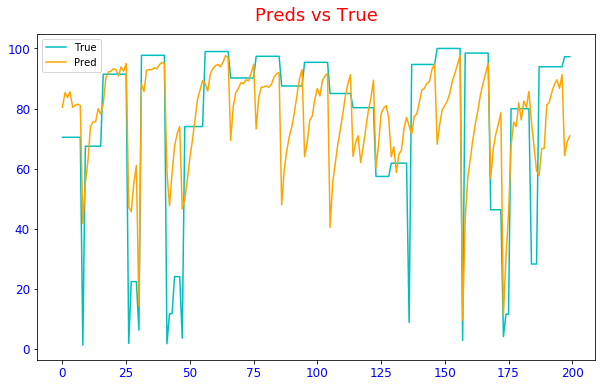

In [101]:
title_ticks_ecc('Preds vs True', '' , '')
plt.plot(ytrue[:200], color='c', label= 'True')
plt.plot(ypred[:200], color='orange', label= 'Pred')
plt.legend()

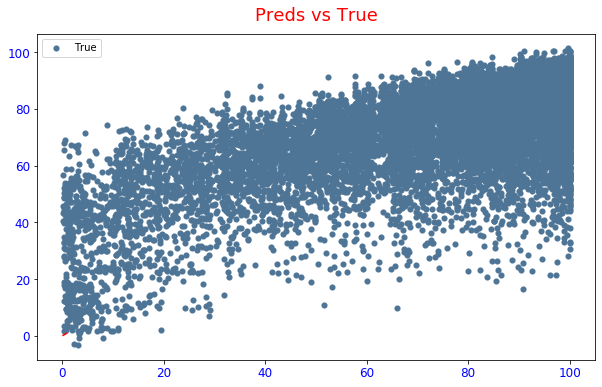

In [110]:
biset_x= np.linspace(0, 1, 100)
biset_y= biset_x

title_ticks_ecc('Preds vs True', '' , '')
plt.scatter(ytrue, ypred, color='xkcd:cadet blue', label= 'True', linewidth= 0.1)
plt.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), '--', color='red', linewidth= 1.5)
plt.legend()

In [273]:
#sns.regplot(ytrue, ypred, scatter_kws={"s": 2}, )

<Figure size 1080x720 with 0 Axes>

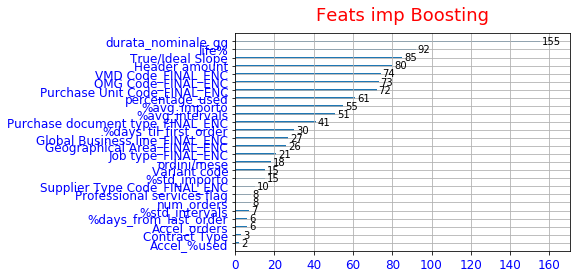

In [112]:
plt.figure(figsize= (15,10))
plot_importance(best_xgb.best_estimator_)
title_ticks_ecc('Feats imp Boosting', '', '', new_fig= False)

In [ ]:
####################################################################################################################

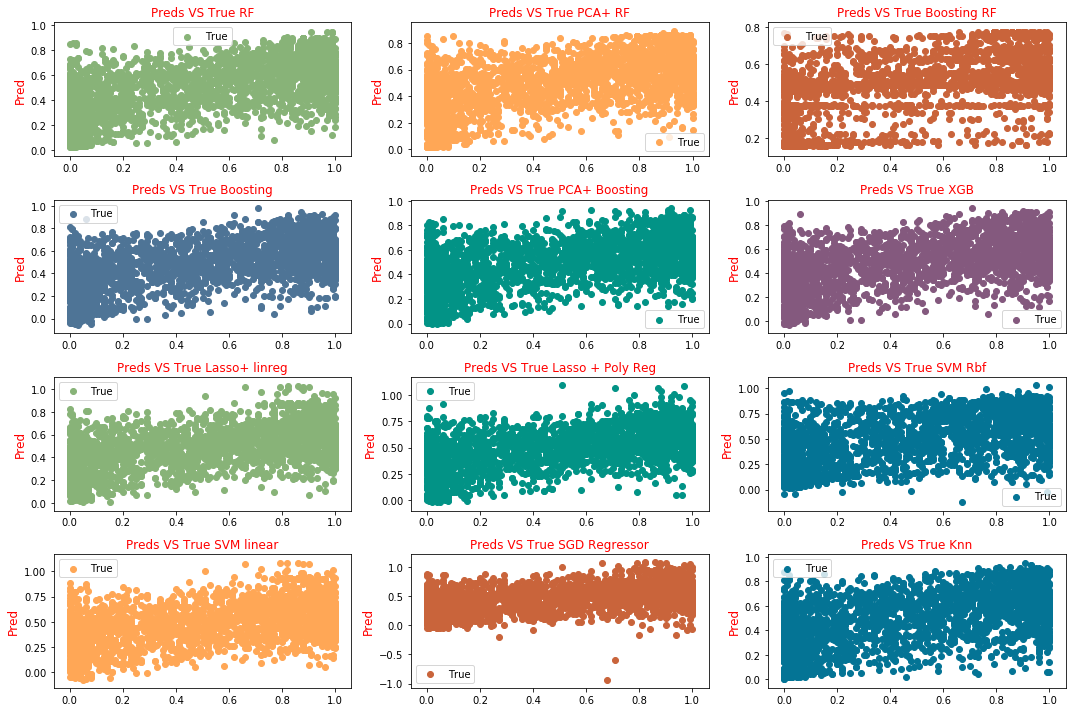

In [310]:
estimators= [best_reg_rf, best_pca_rf_reg, best_gbrf, best_gb_old, best_pca_gb, best_xgb, best_lasso_linreg, 
             best_lasso_polyreg, best_rbf_svm_reg, best_pca_svm_reg, best_pca_sgd, best_knn_reg]

names_estimators= ['RF', 'PCA+ RF', 'Boosting RF', 'Boosting', 'PCA+ Boosting', 'XGB', 'Lasso+ linreg', 'Lasso + Poly Reg', 
                   'SVM Rbf', 'SVM linear', 'SGD Regressor', 'Knn' ]

diz_est_names= dict(zip(estimators, names_estimators))

rows_for_3cols= np.ceil(len(estimators)/3)

plt.figure(figsize= (15, 10))
for i, est in enumerate(estimators):
    ypred= pd.Series(est.predict(cont_reg['X_test']), index= np.arange(len(cont_reg['ytest'])))
    
    plt.subplot(rows_for_3cols, 3, i+1)
    plt.title('Preds VS True {}'.format(diz_est_names[est]), fontsize= 12, color= 'red')
    plt.scatter(ytrue, ypred, label= 'True', c= np.random.choice(colors))
    plt.ylabel('Pred', fontsize= 12, color= 'red')
    plt.legend()
    plt.tight_layout()

plt.savefig('../../Tesi/figure/Static/reg_plots.PNG')

In [116]:
data= pd.DataFrame()
data['True']= cont_reg['ytest']
data['Pred']= rf_only_imp.predict(cont_reg['X_test'][feats])
data.head(9)

,True,Pred
80,70.41,76.282898
81,70.41,82.430159
82,70.41,81.179815
83,70.41,85.365541
84,70.41,78.866998
85,70.41,79.292570
86,70.41,82.708261
87,70.41,82.518731
460,1.23,45.197948


(0, 1.05)

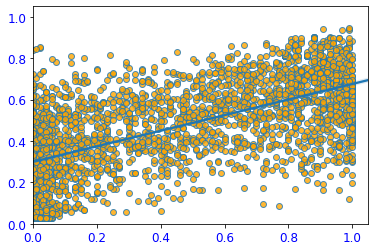

In [328]:
sns.regplot(data= data, x= 'True', y='Pred', scatter_kws={'facecolors': 'orange'})
title_ticks_ecc('', '', '', new_fig= False, )
plt.ylim(0,1.05)
plt.xlim(0,1.05)

## <center><h3> Voting Regressor 

In [151]:
estimators= [('rf', best_reg_rf.best_estimator_),
            ('xgboost', best_pca_boost_reg.best_estimator_),]    #('rf', best_reg_rf.best_estimator_),('xgboost', best_xgb.best_estimator_)
                #('gb_old', best_reg_gb_old.best_estimator_), ('svm', best_lasso_svm_reg.best_estimator_),


voting_hard_reg= VotingRegressor(
       estimators= estimators,
        n_jobs= 4)  #weights=[2,1,1],  flatten_transform=True

In [152]:
voting_hard_reg= run_model(voting_hard_reg, 'reg')

Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)

train MAE is 13.6422 
test MAE is 14.7312 

train RMSE is 18.2694 
test RMSE is 19.4155 

train MAPE in %is 97.0 
test MAPE in %is 106.0 
execution time (min)= 2.2  finished at  2019-11-25 19:05:09.370430


## <center> Error Analysis based on %life

In [123]:
best_reg_rf.predict(cont_reg['X_test'])[:3]

array([74.97787164, 82.65594805, 81.95683726])

In [ ]:
estimators= [('rf', rf_only_imp.best_estimator_),
            ('xgboost', best_pca_boost_reg.best_estimator_),]  

In [131]:
lifes= cont_reg['X_test']['life%'].unique()

voting_clean= pd.DataFrame(columns= ['RF', 'xgb'])
voting_clean['RF']= best_reg_rf.predict(cont_reg['X_test'])
voting_clean['xgb']= best_pca_boost_reg.predict(cont_reg['X_test'])
voting_clean['LABEL']= cont_reg['ytest'].values
voting_clean['life%']= cont_reg['X_test']['life%'].values
voting_clean['life%']= voting_clean['life%'].map(dict(zip(sorted(voting_clean['life%'].unique()), lifes)))

voting_clean['Preds_RF']= voting_clean['RF']
voting_clean['Preds_xgb']= voting_clean['xgb']

voting_clean.head(2)

,RF,xgb,LABEL,life%,Preds_RF,Preds_xgb
0,74.977872,80.240059,70.41,-0.75,74.977872,80.240059
1,82.655948,88.621277,70.41,-0.50,82.655948,88.621277


In [132]:
(best_reg_rf.predict(cont_reg['X_test'])== voting_clean['Preds_RF']).sum()== len(voting_clean) #check ok, prediz con proba uguali a quelle vere

True

In [135]:
print(round(mean_absolute_error(voting_clean['LABEL'], voting_clean['Preds_RF']), 3))
print(round(np.sqrt(mean_squared_error(voting_clean['LABEL'], voting_clean['Preds_RF'])),3))

14.771
19.47


In [136]:
voting_clean.corr()

,RF,xgb,LABEL,life%,Preds_RF,Preds_xgb
RF,1.000000,0.957961,0.693459,0.725248,1.000000,0.957961
xgb,0.957961,1.000000,0.683392,0.698085,0.957961,1.000000
LABEL,0.693459,0.683392,1.000000,0.492090,0.693459,0.683392
life%,0.725248,0.698085,0.492090,1.000000,0.725248,0.698085
Preds_RF,1.000000,0.957961,0.693459,0.725248,1.000000,0.957961
Preds_xgb,0.957961,1.000000,0.683392,0.698085,0.957961,1.000000


In [146]:
life_scores= dict()

models= ['RF', 'xgb']

for model in models:
    life_scores[model]= {}
    for life in lifes: 
        life_scores[model][life]= {'MAE': 0, 'RMSE':0}
    
life_scores

{'RF': {-0.75: {'MAE': 0, 'RMSE': 0},
  -0.5: {'MAE': 0, 'RMSE': 0},
  -0.25: {'MAE': 0, 'RMSE': 0},
  0.0: {'MAE': 0, 'RMSE': 0},
  0.25: {'MAE': 0, 'RMSE': 0},
  0.5: {'MAE': 0, 'RMSE': 0},
  0.75: {'MAE': 0, 'RMSE': 0},
  1.0: {'MAE': 0, 'RMSE': 0},
  1.25: {'MAE': 0, 'RMSE': 0},
  1.5: {'MAE': 0, 'RMSE': 0}},
 'xgb': {-0.75: {'MAE': 0, 'RMSE': 0},
  -0.5: {'MAE': 0, 'RMSE': 0},
  -0.25: {'MAE': 0, 'RMSE': 0},
  0.0: {'MAE': 0, 'RMSE': 0},
  0.25: {'MAE': 0, 'RMSE': 0},
  0.5: {'MAE': 0, 'RMSE': 0},
  0.75: {'MAE': 0, 'RMSE': 0},
  1.0: {'MAE': 0, 'RMSE': 0},
  1.25: {'MAE': 0, 'RMSE': 0},
  1.5: {'MAE': 0, 'RMSE': 0}}}

In [147]:
for model in models:
    for i,life in enumerate(sorted(voting_clean['life%'].unique())):
        df_life= voting_clean[voting_clean['life%']== life]

        life_scores[model][lifes[i]]['MAE'] = round(mean_absolute_error(df_life['LABEL'], df_life['Preds_' + model]), 3)
        life_scores[model][lifes[i]]['RMSE'] = round(np.sqrt(mean_squared_error(df_life['LABEL'], df_life['Preds_' + model])),3)
        life_scores[model][lifes[i]]['% samples']= round(100*(len(df_life)/len(voting_clean)),3)

In [148]:
df_life_scores_RF= pd.DataFrame(life_scores['RF']).T
df_life_scores_xgb= pd.DataFrame(life_scores['xgb']).T

df_life_scores= df_life_scores_RF.join(df_life_scores_xgb.drop('% samples', axis=1), how='inner', 
                                       lsuffix= '_RF', rsuffix= '_xgb')

df_life_scores=df_life_scores.set_index('% samples').reset_index()
df_life_scores.index= [ str(value*10)+'% life' for value in df_life_scores.index]

df_life_scores

,% samples,MAE_RF,RMSE_RF,MAE_xgb,RMSE_xgb
0% life,18.425,22.033,27.375,22.619,27.989
10% life,14.235,20.314,24.623,20.309,24.617
20% life,12.524,17.651,21.213,17.467,21.325
30% life,11.492,15.334,18.815,15.383,18.884
40% life,10.414,13.178,16.036,13.198,16.062
50% life,9.329,10.810,13.096,10.917,13.346
60% life,8.131,8.532,10.326,8.786,10.883
70% life,6.918,6.451,7.876,6.787,8.545
80% life,5.335,4.666,5.533,5.327,6.693
90% life,3.195,2.396,2.849,3.945,5.361


In [149]:
np.mean(df_life_scores['MAE_RF']), np.average(df_life_scores['MAE_RF'], weights= df_life_scores['% samples'])

(12.1365, 14.770690303806083)

In [150]:
np.mean(df_life_scores['MAE_xgb']), np.average(df_life_scores['MAE_xgb'], weights= df_life_scores['% samples'])

(12.4738, 15.001257535150705)

### Error in respect to nominal duration

In [173]:
durate_nominali= pd.read_pickle('../durate_nominali.pk1').squeeze().to_dict()
durate_test= container_reg['X_test'].index.map(durate_nominali)
durate_test

Int64Index([1095, 1095, 1095, 1095, 1095, 1095, 1095, 1095,   81,  639,
            ...
             305,  305,  305,  305,  305,  353,  188,   30,   30,   30],
           dtype='int64', name='Purchase document', length=13270)

In [186]:
map_lifes= dict(zip(container_reg['X_test']['life%'].unique(), [0, 0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9]))
map_lifes

{-0.75: 0,
 -0.5: 0.1,
 -0.25: 0.2,
 0.0: 0.3,
 0.25: 0.4,
 0.5: 0.5,
 0.75: 0.6,
 1.0: 0.7,
 1.25: 0.8,
 1.5: 0.9}

In [232]:
############# Errore rispetto a durata nominale #########################
delta_preds_life = pd.DataFrame()
delta_preds_life['durata_nominale_gg']= durate_test
delta_preds_life['durata_binned_quartiles']= pd.qcut(delta_preds_life['durata_nominale_gg'], q=4)
delta_preds_life['True_life']= container_reg['ytest'].values
delta_preds_life['preds_life']= best_reg_rf.predict(container_reg['X_test'])
delta_preds_life['delta errore %']= abs(delta_preds_life['True_life']- delta_preds_life['preds_life'])
delta_preds_life['delta errore gg']= delta_preds_life['durata_nominale_gg']*delta_preds_life['delta errore %']/100
delta_preds_life['life%']= container_reg['X_test']['life%'].map(map_lifes).values

delta_preds_life.head()

,durata_nominale_gg,durata_binned_quartiles,True_life,preds_life,delta errore %,delta errore gg,life%
0,1095,"(730.0, 2191.0]",70.41,74.977872,4.567872,50.018194,0.0
1,1095,"(730.0, 2191.0]",70.41,82.655948,12.245948,134.093131,0.1
2,1095,"(730.0, 2191.0]",70.41,81.956837,11.546837,126.437868,0.2
3,1095,"(730.0, 2191.0]",70.41,87.733501,17.323501,189.692334,0.3
4,1095,"(730.0, 2191.0]",70.41,79.733425,9.323425,102.091500,0.4


In [225]:
delta_preds_life['durata_nominale_gg'].describe()

count    13270.000000
mean       520.797438
std        371.308611
min         30.000000
25%        221.000000
50%        394.000000
75%        730.000000
max       2191.000000
Name: durata_nominale_gg, dtype: float64

In [236]:
delta_preds_life.groupby('durata_binned_quartiles')['delta errore gg', 'delta errore %'].agg({'mean': np.mean, 'std': np.std})

mean                            std  \
                        delta errore gg delta errore % delta errore gg   
durata_binned_quartiles                                                  
(29.999, 221.0]               22.770460      16.970553       20.803092   
(221.0, 394.0]                52.754508      15.834342       44.991605   
(394.0, 730.0]                78.074583      13.793755       75.461884   
(730.0, 2191.0]              129.667879      12.442258      119.331566   

                                        
                        delta errore %  
durata_binned_quartiles                 
(29.999, 221.0]              12.973345  
(221.0, 394.0]               13.187325  
(394.0, 730.0]               12.708046  
(730.0, 2191.0]              11.266254

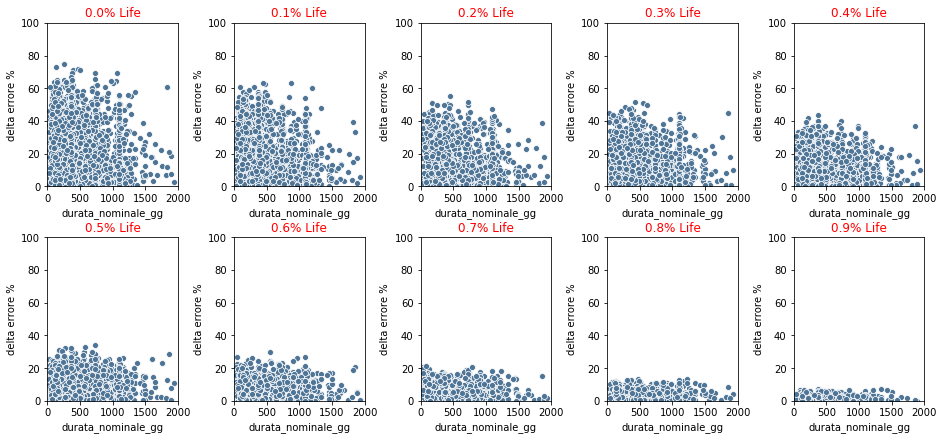

In [224]:
cols= 5
rows= 2

title_ticks_ecc('','', '', figsize=(13,6))
for i,life in enumerate(delta_preds_life['life%'].unique()):
    df_life= delta_preds_life[delta_preds_life['life%']== life]
    plt.subplot(rows, cols, i+1)
    plt.title('{}% Life'.format(life), color='red', fontsize= 12)
    #plt.ylabel('% Error', color='red')
    #plt.xlabel('% Error', color='red')
    plt.ylim(0,100)
    plt.xlim(0,2000)
    sns.scatterplot(df_life['durata_nominale_gg'], df_life['delta errore %'], color= 'xkcd:cadet blue')
plt.tight_layout(pad=0.3)
plt.savefig('../Reg_errors_durate_rolling.PNG')

In [192]:
delta_preds_life.groupby('life%')['durata_nominale_gg', 'delta errore gg', 'delta errore %'].agg({'mean': np.mean, 'std': np.std})

mean                                               std  \
      durata_nominale_gg delta errore gg delta errore % durata_nominale_gg   
life%                                                                        
0.0           486.116973      101.885244      22.033179         349.785816   
0.1           492.674431       91.597607      20.314102         359.685596   
0.2           509.937425       82.332265      17.650788         366.947184   
0.3           522.622295       73.484236      15.334244         372.504007   
0.4           533.391462       65.237317      13.178112         377.784265   
0.5           547.928110       56.503593      10.810220         382.176648   
0.6           551.700649       45.012478       8.532242         386.517812   
0.7           559.003268       34.802376       6.451045         386.989732   
0.8           555.364407       25.781298       4.666181         385.988615   
0.9           542.733491       12.737695       2.396211         377.626978   

                                      
      delta errore gg delta errore %  
life%                                 
0.0        114.077911      16.249882  
0.1         94.496850      13.918833  
0.2         83.390960      11.769655  
0.3         79.626895      10.906201  
0.4         68.464561       9.141047  
0.5         59.779054       7.395077  
0.6         48.468548       5.818143  
0.7         37.637725       4.520171  
0.8         27.493561       2.976086  
0.9         13.583646       1.543739

In [180]:
delta_preds_life['delta errore gg'].describe()

count    13270.000000
mean        70.483602
std         84.030281
min          0.000766
25%         15.384128
50%         40.558035
75%         95.173334
max       1104.657114
Name: delta errore gg, dtype: float64

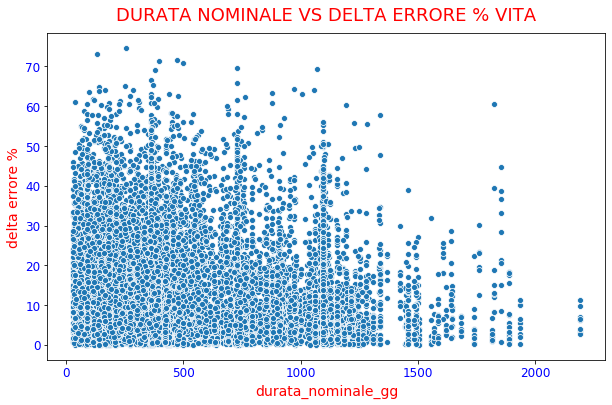

In [195]:
title_ticks_ecc('DURATA NOMINALE VS DELTA ERRORE % VITA', 'Durata Nominale', 'Pred % Life')
sns.scatterplot(delta_preds_life['durata_nominale_gg'], delta_preds_life['delta errore %'])

#### Checkpoint: Automating Error analysis for Regression

In [241]:
def analisi_err_reg(best_model, map_lifes, durate_test, container= None, model_name= None, X_test= None, ytest= None,
                   plots_life_duration = True):
    
    """ Creao dizionario con chiavi:  ['delta_preds_life', 'grouped_by_duration', 'grouped_by_life']"""
    if X_test is not None and ytest is not None:
        X= X_test
        y= ytest
    else:
        X= container['X_test']
        y= container['ytest']
        
    delta_preds_life = pd.DataFrame()
    delta_preds_life['durata_nominale_gg']= durate_test
    delta_preds_life['durata_binned_quartiles']= pd.qcut(delta_preds_life['durata_nominale_gg'], q=4)
    delta_preds_life['True_life']= y.values
    delta_preds_life['preds_life']= best_model.predict(X)
    delta_preds_life['delta errore %']= abs(delta_preds_life['True_life']- delta_preds_life['preds_life'])
    delta_preds_life['delta errore gg']= delta_preds_life['durata_nominale_gg']*delta_preds_life['delta errore %']/100
    delta_preds_life['life%']= X['life%'].map(map_lifes).values
    
    grouped_by_duration= delta_preds_life.groupby('durata_binned_quartiles')['delta errore gg', 'delta errore %'].agg(
                                                                        {'mean': np.mean, 'std': np.std})
    
    grouped_by_life= delta_preds_life.groupby('life%')['durata_nominale_gg', 'delta errore gg', 'delta errore %'].agg({'mean': np.mean, 'std': np.std})
    
    if plots_life_duration is True:
        cols= 5
        rows= 2

        title_ticks_ecc('','', '', figsize=(13,6))
        for i,life in enumerate(delta_preds_life['life%'].unique()):
            df_life= delta_preds_life[delta_preds_life['life%']== life]
            plt.subplot(rows, cols, i+1)
            plt.title('{}% Life'.format(life), color='red', fontsize= 12)
            #plt.ylabel('% Error', color='red')
            #plt.xlabel('% Error', color='red')
            plt.ylim(0,100)
            plt.xlim(0,2000)
            sns.scatterplot(df_life['durata_nominale_gg'], df_life['delta errore %'], color= 'xkcd:cadet blue')
        plt.tight_layout(pad=0.3)
        #plt.savefig('../Reg_errors_durate_rolling.PNG')
        
    diz= {}
    diz['delta_preds_life']= delta_preds_life
    diz['grouped_by_duration']= grouped_by_duration
    diz['grouped_by_life']= grouped_by_life
    
    return diz

mean                            std  \
                        delta errore gg delta errore % delta errore gg   
durata_binned_quartiles                                                  
(29.999, 221.0]               22.770460      16.970553       20.803092   
(221.0, 394.0]                52.754508      15.834342       44.991605   
(394.0, 730.0]                78.074583      13.793755       75.461884   
(730.0, 2191.0]              129.667879      12.442258      119.331566   

                                        
                        delta errore %  
durata_binned_quartiles                 
(29.999, 221.0]              12.973345  
(221.0, 394.0]               13.187325  
(394.0, 730.0]               12.708046  
(730.0, 2191.0]              11.266254

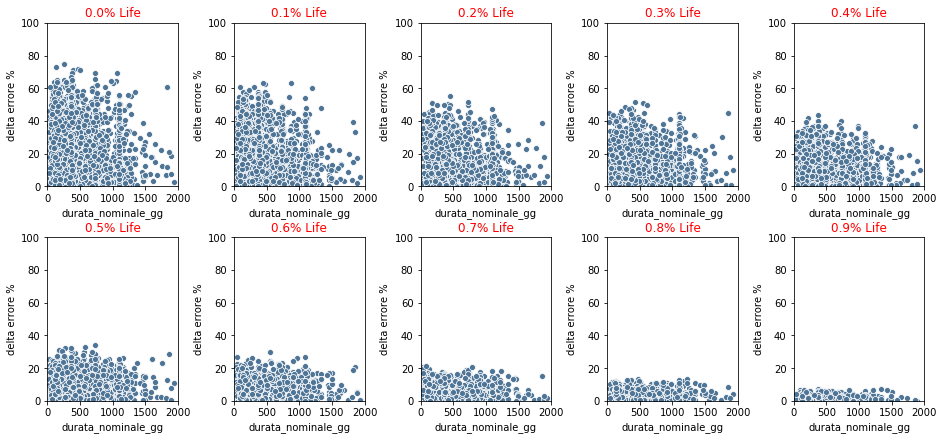

In [242]:
rf_analysis= analisi_err_reg(best_reg_rf, map_lifes, durate_test, container_reg)
rf_analysis['grouped_by_duration']

In [249]:
rf_analysis['grouped_by_life']

mean                                               std  \
      durata_nominale_gg delta errore gg delta errore % durata_nominale_gg   
life%                                                                        
0.0           486.116973      101.885244      22.033179         349.785816   
0.1           492.674431       91.597607      20.314102         359.685596   
0.2           509.937425       82.332265      17.650788         366.947184   
0.3           522.622295       73.484236      15.334244         372.504007   
0.4           533.391462       65.237317      13.178112         377.784265   
0.5           547.928110       56.503593      10.810220         382.176648   
0.6           551.700649       45.012478       8.532242         386.517812   
0.7           559.003268       34.802376       6.451045         386.989732   
0.8           555.364407       25.781298       4.666181         385.988615   
0.9           542.733491       12.737695       2.396211         377.626978   

                                      
      delta errore gg delta errore %  
life%                                 
0.0        114.077911      16.249882  
0.1         94.496850      13.918833  
0.2         83.390960      11.769655  
0.3         79.626895      10.906201  
0.4         68.464561       9.141047  
0.5         59.779054       7.395077  
0.6         48.468548       5.818143  
0.7         37.637725       4.520171  
0.8         27.493561       2.976086  
0.9         13.583646       1.543739

Text(0, 0.5, 'Errore %')

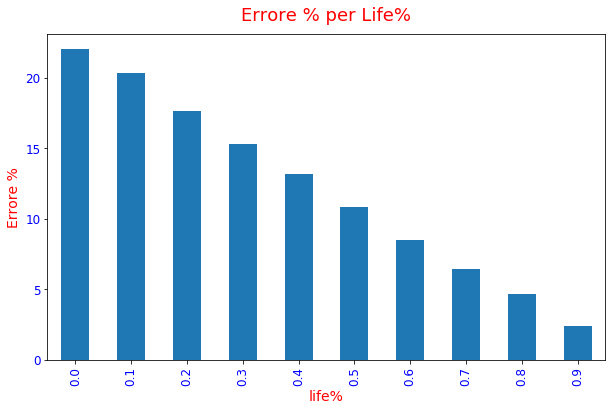

In [252]:
title_ticks_ecc('Errore % per Life%', 'Errore %', '')
rf_analysis['grouped_by_life']['mean']['delta errore %'].plot(kind='bar')
plt.ylabel('Errore %')

<h1> <center> NEURAL NETWORKS

In [ ]:
############################################## ON COLAB ##########################################################